# Matrice pseudoinversa per la regressione lineare

# Introduzione

Sia in scienza che in ingegneria è necessario creare modelli che si adattino ai 
nostri dati, il più semplice dei quali è un modello lineare.

Il problema di regressione (o fit) lineare consiste nel trovare la retta che si adatta meglio ad una nuvola di punti dati ed è simile al (ma più difficile del) problema di trovare la linea che passa per un gran numero di punti colineari. La difficoltà è che ovviamente non esiste una linea che passa attraverso tutti i punti in una nuvola di punti non colineari, ovvero del tipo che si ottengono da misurazioni sperimentali (considerando le incertezze e la modellizzazione non perfetta dell'esperimento).

Lo scopo di questa lezione è di introdurre la pseudoinversa, lo strumento matematico utilizzato per calcolare la i coefficienti di pendenza e intercetta di un fit lineare, in modo graduale e intuitivo, ed esplorare il potenziale di generalizzazione di tale metodo utilizzando lo stesso codice e gli stessi concetti per stimare i pagamenti per assicurazione medica date altre caratteristiche di salute, un problema di regressione con più variabili di input.

# Retta passante per 2 punti

Come possiamo trovare la linea che passa per 2 punti? Questo è molto semplice, ma un ripasso ci aiuterà a generalizzare nei casi più difficili:


\begin{equation}
    \begin{cases}
      m x_0 + c = y_0\\
      m x_1 + c = y_1\\
    \end{cases}
\end{equation}

\begin{equation}
 \begin{pmatrix}
    x_{0}       & 1  \\
    x_{1}       & 1 \\
\end{pmatrix}  \begin{pmatrix}
    m         \\
    c        \\
\end{pmatrix} = \begin{pmatrix}
    y_0         \\
    y_1       \\
\end{pmatrix}
\end{equation}


\begin{equation}
  \begin{pmatrix}
    m         \\
    c       \\ \end{pmatrix}= \begin{pmatrix}
    x_{0}       & 1  \\
    x_{1}       & 1 \\
\end{pmatrix}^{-1}  \begin{pmatrix}
    y_0         \\
    y_1        \\
\end{pmatrix}
\end{equation}


\begin{equation}
  \begin{pmatrix}
    m         \\
    c       \\ \end{pmatrix}= \begin{pmatrix}
    \frac{1}{x_0 - x_1}       & \frac{-1}{x_0 - x_1}  \\
    -\frac{x_1}{x_0 - x_1}       & \frac{x_0}{x_0 - x_1} \\
\end{pmatrix}  \begin{pmatrix}
    y_0         \\
    y_1        \\
\end{pmatrix}
\end{equation}

\begin{equation}
    \begin{cases}
      m = \frac{y_0 - y_1}{x_0 - x_1} \\
      c = y_0 - m x_0 = y_0 - \frac{y_0 - y_1}{x_0 - x_1} x_0\\
    \end{cases}
\end{equation}

Diamo un nome ai componenti del sistema per riferirci ad essi in maniera più comoda in futuro:

\begin{equation}
  A= \begin{pmatrix}
    x_{0}       & 1  \\
    x_{1}       & 1 \\
\end{pmatrix}
\end{equation}


\begin{equation}
  x= \begin{pmatrix}
    m        \\
    c        \\
\end{pmatrix}
\end{equation}


\begin{equation}
  b = \begin{pmatrix}
    y_{0}        \\
    y_{1}       \\
\end{pmatrix}
\end{equation}

Stai attento! Il vettore $x$ contiene $m$ e $c$ che sono le NOSTRE incognite: in questo problema gli $x_i$, $y_i$ sono dati noti quindi non sono incognite.


Il passaggio essenziale per risolvere questo problema è moltiplicare entrambi i membri per l'inversa della matrice $A$ da sinistra. Possiamo notare che l'inversa di $A$ moltiplicata per $A$ è l'identità e sappiamo come calcolare l'inversa di una matrice quadrata non singolare.

# Implementazione della retta passante per 2 punti


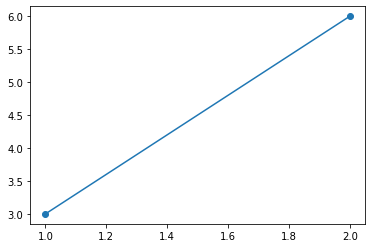

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

points = [(1,3), [2,6]]
xs = [point[0] for point in points]
ys = [point[1] for point in points]

A = np.column_stack( [xs, np.ones(len(xs), dtype=float) ])

m_c = np.linalg.inv(A) @ ys

def fitted_line(x):
    m, c = m_c
    return m*x + c

plt.scatter(xs, ys)
plt.plot(xs, [fitted_line(x) for x in xs])

# E se avessimo 3 punti che sono **quasi** colineari?

Proviamo ora a trovare la retta passante per 3 punti non colineari con lo stesso metodo utilizzato sopra:

\begin{equation}
    \begin{cases}
      m x_0 + c = y_0\\
      m x_1 + c = y_1\\
      m x_2 + c = y_2\\
    \end{cases}
\end{equation}

Fin qui tutto bene, dobbiamo solo aggiungere una terza equazione simile alle prime due.

\begin{equation}
 \begin{pmatrix}
    x_{0}       & 1  \\
    x_{1}       & 1 \\
    x_{2}       & 1 \\
\end{pmatrix}  \begin{pmatrix}
    m         \\
    c        \\
\end{pmatrix} = \begin{pmatrix}
    y_0         \\
    y_1       \\
    y_2       \\
\end{pmatrix}
\end{equation}

Ora dobbiamo solo moltiplicare entrambi i membri per l'inversa della matrice dei coefficienti A... ma A è una matrice 3x2, quindi l'inversa non esiste!

In fondo dovevamo aspettarci di trovarci davanti a un passaggio impossibile, abbiamo cercato di trovare qualcosa che non esiste, la retta passante per 3 punti non colineari...

Ma comunque, arrendersi non è soddisfacente: immaginiamo che i tre punti in questione siano:


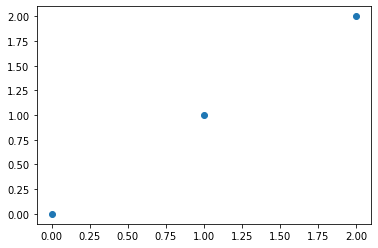

In [ ]:
points = [ (0,0), (1,1), (2.0001, 2)]
xs = [point[0] for point in points]
ys = [point[1] for point in points]
plt.scatter(xs, ys)

# Approccio intuitivo al problema del fit lineare



Questi punti sono *così vicini* all'essere colineari, ci deve essere qualcosa di meglio da fare che arrendersi!

C'è poco da fare sul fatto che il problema come definito prima non è in realtà risolvibile, se i punti non sono colineari nessuna retta li attraversa, questo è un fatto matematico.

Tuttavia, possiamo allentare la nostra richiesta e cercare invece la retta "migliore" ovvero quella che passa il più vicino possibile a quei punti. Questo è un cambio di prospettiva estremamente potente: nel mondo reale dobbiamo fare i conti con le incertezze, e lo facciamo cercando la retta migliore possibile piuttosto che una retta "perfetta" (passante per tutti i punti) che non esiste.

In primo luogo proviamo ad affrontare il problema in un modo molto semplice e di buon senso.

Abbiamo l'equazione:

\begin{equation}
Ax = b
\end{equation}

Dove vogliamo trovare $x$ ma $A$ è rettangolare (con dimensione $m$x$n$) quindi non possiamo moltiplicare entrambi i membri per l'inversa di $A$, poiché non esiste. Pensiamoci, l'inversa non esiste, ma esiste l'inversa per matrici quadrate, quindi potremmo provare a moltiplicare entrambi i membri a sinistra per una matrice di dimensione $n$x$m$ in modo da ottenere una matrice quadrata a sinistra, dopo possiamo moltiplicare entrambi i membri per l'inversa di questa nuova matrice quadrata, isolando quindi la $x$ a sinstra dell'equazione e risolvendo il problema! Cioè se avessimo la matrice $C$ che stiamo cercando potremmo risolvere il problema così:

\begin{equation}
C Ax = C b
\end{equation}

\begin{equation}
x = (C A) ^ {-1} C b
\end{equation}


Quindi quale matrice scegliere? Teniamo presente 3 regole euristiche:

- La procedura originale con l'inversa funziona per trovare la retta passante per due punti, quindi vogliamo rimanere "il più vicino possibile" ad essa quando generalizziamo a più punti.
- Il Rasoio di Occam, più semplice è, meglio è.
- Data l'assunzione semplificativa che tutti i punti hanno la stessa incertezza, tutti i punti dovrebbero essere "trattati allo stesso modo" nel calcolo utilizzato per ottenere la retta di miglior fit (es: se nella matrice moltiplichiamo la $x$ dell' $8 $-avo punto per $2$ ma lasciamo invariati le $x$ degli altri punti questo non ha senso: perché l' $8$-avo punto dovrebbe essere due volte più importante degli altri se ha la stessa incertezza ed è stato misurato allo stesso modo degli altri?).

Ok, quindi più è semplice, meglio è, potremmo provare a moltiplicare per una matrice di tutti $1$? No, perché la matrice risultante è quadrata ma non è nemmeno di rango completo, quindi l'inversa non esiste.

Ok, quindi potremmo provare con una matrice piena di numeri casuali? Bhé, questo è sia davvero arbitrario (ci aspettiamo che l'iniezione di così tanti dati casuali nel nostro sistema distrugga le informazioni contenute nei nostri dati) sia molto diverso dalla procedura originale in cui utilizziamo l'inversa di $A$, che è una matrice derivata da $ A$, non qualcosa di strano o casuale. .

Ok, quindi quale matrice ha la forma corretta, è semplice, dà la stessa importanza a ciascun punto, deriva da $A$ ed è "simile all'inversa di $A$"? La trasposta di $A$! Infatti la trasposta è uguale all'inversa se la matrice è ortogonale (ovvero ogni colonna ha lunghezza unitaria ed è perpendicolare ad ogni altra colonna, come ad esempio nelle matrici di rotazione). Inoltre nella trasposta trattiamo allo stesso modo la $x$ di ogni punto contenuta in $A$ (cioè lo lasciamo invariato). Ovviamente in generale la trasposta e l'inversa sono diverse, ma usare la trasposta per questo sembra abbastanza ragionevole. Così:

\begin{equation}
Ax = b
\end{equation}

\begin{equation}
A^T Ax = A^T b
\end{equation}

Ora la matrice $A^T A$ è quadrata, quindi possiamo moltiplicare per la sua inversa:

\begin{equation}
x = (A^T A) ^ {-1} A^T b
\end{equation}

E' affascinante notare che, questa soluzione, trovata seguendo euristiche intuitive e semplici, non è solo una buona soluzione (approssimata) per il sistema lineare, ma è la MIGLIORE soluzione approssimata POSSIBILE, cioè quella che minimizza la somma dell'errore al quadrato di tutte le previsioni (maggiori dettagli su questa misura dell'errore in seguito).


# Introduzione intuitiva all'ottimizzazione e alla funzione di loss


Come accennato in precedenza, stiamo cercando la linea "migliore" che passi il più vicino possibile ai nostri punti. Questo è un cambio di prospettiva estremamente potente: nel mondo reale dobbiamo fare i conti con le incertezze, e lo facciamo chiedendo di avere la linea migliore possibile piuttosto che una linea "perfetta" (passante per tutti i punti) che non esiste .

Quali sono gli esempi di ottimizzazione intuitiva che facciamo nella nostra vita? Ad esempio quando si vuole andare all'università o al lavoro è ragionevole supporre in prima approssimazione di voler ridurre al minimo la durata del viaggio. <!--
, questo è ragionevole, ma preferiresti 39 minuti di guida in un traffico infernale o 40 minuti di piacevole passeggiata in un parco? Naturalmente il secondo è molto più rilassante e il singolo minuto aggiuntivo è insignificante in confronto. In generale persone diverse avranno un diverso compromesso tra tempo e tranquillità e come tali sceglieranno percorsi e modalità di trasporto diversi anche se i punti di partenza e di arrivo sono gli stessi.-->

Come possiamo formalizzare matematicamente un problema del genere? Invece di cercare di trovare un modo per teletrasportarci al lavoro, possiamo accettare che il viaggio richiederà necessariamente almeno *un po'* di tempo e che possiamo solo cercare di ridurre al minimo il tempo di viaggio. Quindi l'intuizione principale è che possiamo definire un "funzione di sub-ottimalità", nota in letteratura come "funzione di loss / loss function" che specifica con una precisa operazione matematica quanto la nostra soluzione è peggiore di una soluzione perfetta (che in pratica non esiste mai per problemi reali). A questa teorica soluzione (scelta dei parametri) perfetta si assegna una loss $= 0$, per ogni altra soluzione la loss avrà un certo valore $> 0$, tanto maggiore è la loss tanto più lontani siamo dalla soluzione perfetta. Per il problema di ricerca del percorso di andare a lavorare la funzione di loss sarà il tempo del viaggio, mentre per il problema di fit lineare la funzione di loss sarà l'errore (al quadrato) del valore y previsto dal nostro modello lineare e il valore y reale, sommato su tutti i punti.

Definire una funzione di loss che dipende sia dai nostri dati che da alcuni parametri sconosciuti è un passo sostanziale nella direzione della risoluzione del problema, poiché esistono tecniche matematiche note per trovare i valori di parametri incogniti (nel nostro caso $m$ e $c$ ) che minimizzano una funzione. La definizione di una funzione di loss appropriata seguita da questa procedura di minimizzazione ci fornirà la linea di miglior fit.

Per collegare l'analogia di prima al nostro problema di fit lineare:

- Cercare di teletrasportarsi al lavoro è analogo a cercare di trovare una retta che passi perfettamente attraverso 3 o più punti non colineari, sarebbe meraviglioso ma è chiaramente impossibile.

- Accettare che almeno un po' di tempo è necessario per il viaggio e cercare di minimizzarlo è analogo ad accettare che almeno una certa distanza verticale dalla retta ai punti sia inevitabile e cercare di minimizzarla.



# Trovare la funzione di loss per il nostro problema



Come menzionato prima, stiamo cercando la retta "migliore", cioè quella che passa il più vicino possibile a quei punti. Questo è un cambio di prospettiva estremamente potente: nel mondo reale dobbiamo fare i conti con le incertezze, e lo facciamo chiedendo di avere la retta migliore possibile piuttosto che una retta "perfetta" (passante per tutti i punti) che non esiste .

\begin{equation}
Ax = b
\end{equation}

Definiamo una funzione di loss, ovvero la somma degli errori al quadrato di tutte le previsioni, che vogliamo minimizzare.

Il termine $Ax$ rappresenta tutte le previsioni di $y_i$ dato $x_i$ (ricorda che le coordinate $x_i$ dei nostri punti sono all'interno della matrice $A$, il vettore $x$ contiene $m$ e $c$)

Nel caso di tre punti il ​​risultato del prodotto $Ax$ sarà:

\begin{equation}
\begin{pmatrix}
    x_{0}       & 1  \\
    x_{1}       & 1 \\
    x_{2}       & 1 \\
\end{pmatrix}  \begin{pmatrix}
    m         \\
    c        \\
\end{pmatrix} =\begin{pmatrix}
      m x_0 + c \\
      m x_1 + c \\
      m x_1 + c \\
\end{pmatrix}
\end{equation}

Quindi data la matrice $A$ matrice contenente i valori $x_i$ di ciascun punto (e una colonna di tutti $1$), l'output della moltiplicazione per il vettore sconosciuto $x$ contenente $m$ e $c$ è la nostra previsione del valore $y$ che dipende dai dati $x_i$ forniti e dai parametri incogniti del nostro modello $m $e $c$.

Inoltre il vettore $b$ contiene i valori $y_i$ di tutti i punti.

Quindi vogliamo che le nostre previsioni per i valori di $y$ dei punti, ottenuti con il prodotto $Ax$, siano il più vicine possibile ai valori reali di $y$ dei punti, contenuti nel vettore $b$. La differenza elemento per elemento (standard) tra $Ax$ e $b$ ci darà un vettore delle differenze tra le altezze reali e previste (valori di $y$), in altre parole, la distanza verticale tra i punti reali e i punti previsti (per i quali la $y$ è il valore della retta di fit per quella $x$). Tenendo conto che sovrastimare e sottostimare il valore target $y$ sono errori ugualmente gravi e che vogliamo evitare che una precedente sovrastima venga annullata da una successiva sottostima, la "funzione di loss", che è il valore complessivo che vogliamo minimizzare per trovare la linea ottimale per i nostri dati, sarà la somma dei quadrati di tutte le differenze tra gli $y_i$ previsti (calcolati con $(Ax)_i$ ) e quelli reali (contenuti in $b_i$), ovvero, in termini geometrici, **la somma dei quadrati delle differenze di altezza tra i valori reali (i punti) e previsti (altezza della retta alla stessa $x$ dei punti) della variabile dipendente $y$**. Convenientemente, dato un vettore, la somma dei quadrati di tutti i suoi elementi può essere ottenuta come prodotto scalare del vettore con se stesso. Così:

\begin{equation}
Loss(x) = (Ax - b)^2 = (Ax - b)^T (Ax - b)
\end{equation}

Scritto esplicitamente per il caso a tre punti, il vettore $Ax - b$ è:

\begin{equation}
\begin{pmatrix}
      (m x_0 + c) - y_0 \\
      (m x_1 + c) - y_1\\
      (m x_1 + c) - y_2\\
\end{pmatrix}
\end{equation}

E la funzione di loss è:

\begin{equation}
      Loss(m, c) = ( (m x_0 + c) - y_0 ) ^ 2 + ( (m x_1 + c) - y_1 ) ^ 2 + ( (m x_1 + c) - y_2) ^ 2
\end{equation}


# Rappresentazione grafica della loss


La funzione di loss sopra descritta è semplicemente la somma delle aree dei quadrati blu, più piccola sarà la somma di queste aree, migliore sarà la linea di miglior fit:

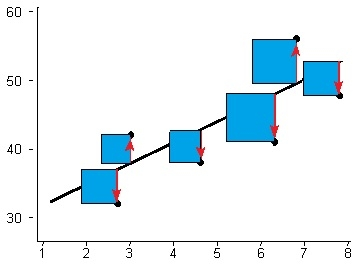

# Dimostrazione dell'ottimalità della pseudoinversa



Ora possiamo trovare i parametri $m$ e $c$ che minimizzano l'errore imponendo che il gradiente rispetto a $x$ sia $= 0$ (il gradiente è una derivata multivariata, imponendo che sia $= 0$ si trova un punto stazionario (che nel nostro caso è un minimo come possiamo verificare mediante un'ispezione visiva del risultato) in analogia a come possiamo trovare punti stazionari in 1 dimensione impostando la derivata $= 0$). Un gradiente uguale a zero significa che l'output non cambia se gli input vengono perturbati in maniera infinitesima, ovvero siamo in un punto stazionario (massimo, minimo o sella). (O meglio, cambia al massimo in maniera proporzionale a un infinitesimo al quadrato, che va a 0 molto velocemente quando l'infinitesimo tende a 0). Le regole per il calcolo del gradiente sono analoghe alle regole per il calcolo della derivata:

\begin{equation}
Loss(x) = (Ax - b)^2 = (Ax - b)^T (Ax - b)
\end{equation}

\begin{equation}
Loss(x) = (Ax)^TAx - (Ax)^Tb - b^TAx + b^2
\end{equation}

$(Ax)^Tb$ è uno scalare (un numero) quindi la trasposizione non fa nulla, quindi è uguale a $( (Ax)^Tb ) ^ T = b^TAx$ (perché $(AB)^T = B^T A^T$).

\begin{equation}
Loss(x) = (Ax)^TAx - 2(Ax)^Tb + b^2
\end{equation}


\begin{equation}
   \frac{\partial Loss(x)}{\partial x} = A^TAx - 2A^Tb 
\end{equation}

\begin{equation}
    2A^TAx_{min} - 2A^Tb = 0
\end{equation}

\begin{equation}
    2A^TAx_{min} = + 2A^Tb
\end{equation}

\begin{equation}
    x_{min} = (A^TA)^{-1}A^Tb
\end{equation}


La matrice $$A^{\#} = (A^TA)^{-1}A^T$$ è chiamata pseudoinversa di $A$ e abbiamo dimostrato che trova la MIGLIORE POSSIBILE (errore minimo al quadrato per previsioni) retta che si adatta ai nostri punti dati. Questa è la matrice che può essere utilizzata con la funzione `pinv` della libreria numerica `numpy` che useremo in seguito.


# Trovare la retta migliore che passa per i 3 punti

Found line equation y = 0.9999500016666666x + 1.6666666611375724e-05


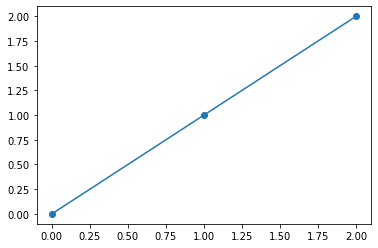

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

points = [(0, 0), [1, 1], [2.0001, 2]]
xs = [point[0] for point in points]
ys = [point[1] for point in points]

A = np.column_stack( [xs, np.ones(len(xs), dtype=float) ])

m_c = np.linalg.pinv(A) @ ys # ONLY CHANGE inv -> pinv

def fitted_line(x):
    m, c = m_c
    return m*x + c
m,c = m_c
print(f"Found line equation y = {m}x + {c}")
plt.scatter(xs, ys)
plt.plot(xs, [fitted_line(x) for x in xs])

# Applicazione a un esperimento simulato

Di seguito simulo un esperimento in cui un corpo si muove senza attrito sul ghiaccio, con una velocità costante. Come sappiamo la posizione di un corpo è il prodotto tra il tempo e la velocità (più la posizione iniziale):

$$s = s_0 + v t $$


Ad ogni intervallo di tempo viene effettuata una misura della posizione con un sonar. La pseudoinversa ci permetterà di trovare la migliore stima per la velocità del corpo e la posizione di partenza trovando la linea di miglior fit (la velocità è la pendenza $m$ di quella linea, la posizione di partenza è l'intercetta $c$).

# Generazione di dati simulati

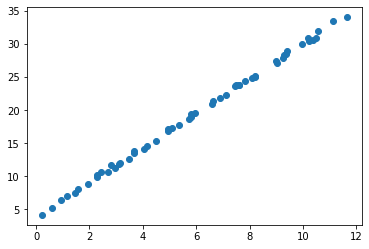

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sampling_per_second = 5 #@param {type:"slider", min:1, max:5, step:1}
noise = 1.01 #@param {type:"slider", min:0.01, max:5, step:0.1}
speed = 2.6 #@param {type:"slider", min:1, max:5, step:0.1}
max_time = 10.9 #@param {type:"slider", min:10.0, max:20.0, step:0.1}
starting_position = 3.5 #@param {type:"slider", min:1, max:5, step:0.1}

times = np.arange(0., max_time, step=1/sampling_per_second)
times += np.random.rand(*times.shape) * noise
real_speed = speed
positions = starting_position + real_speed * times
positions += np.random.rand(*positions.shape) * noise

plt.scatter(times, positions)
plt.show()

# Trovare i parametri del fit lineare


In [ ]:
# la prima colonna di A sono le x, la seconda colonna tutti 1
A = np.column_stack( [times, np.ones(times.shape, dtype=float) ])

A_pinv = np.linalg.pinv(A)

print(A, A_pinv)
print(A.shape, A_pinv.shape)

[[ 0.22812026  1.        ]
 [ 0.60099981  1.        ]
 [ 1.16899548  1.        ]
 [ 1.4660487   1.        ]
 [ 0.94200056  1.        ]
 [ 1.94117132  1.        ]
 [ 1.57982536  1.        ]
 [ 2.26846153  1.        ]
 [ 2.28808111  1.        ]
 [ 2.42943767  1.        ]
 [ 2.79586439  1.        ]
 [ 3.13430145  1.        ]
 [ 2.94205895  1.        ]
 [ 2.67763696  1.        ]
 [ 3.6791066   1.        ]
 [ 3.10646766  1.        ]
 [ 4.16166563  1.        ]
 [ 3.46659954  1.        ]
 [ 3.67754374  1.        ]
 [ 4.03692543  1.        ]
 [ 4.49203547  1.        ]
 [ 4.9300379   1.        ]
 [ 5.10647364  1.        ]
 [ 4.9423849   1.        ]
 [ 5.73547526  1.        ]
 [ 5.95165578  1.        ]
 [ 5.34143051  1.        ]
 [ 5.7863012   1.        ]
 [ 5.78945451  1.        ]
 [ 6.61312486  1.        ]
 [ 6.88343543  1.        ]
 [ 6.58400298  1.        ]
 [ 7.11516665  1.        ]
 [ 7.49350073  1.        ]
 [ 7.43993618  1.        ]
 [ 7.61236461  1.        ]
 [ 7.59373659  1.        ]
 

In [ ]:
m_c = A_pinv @ positions

def fitted_line(x):
    m, c = m_c
    return m*x + c

m_c

array([2.61872337, 3.83820818])

# Grafico del risultato finale

Found line equation y = 2.618723366434476x + 3.838208175387246


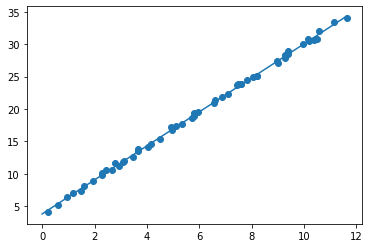

In [ ]:
plt.scatter(times, positions)
x_1, x_2 = 0, times[-1]
m,c = m_c
print(f"Found line equation y = {m}x + {c}")
plt.plot([x_1, x_2], [fitted_line(x_1), fitted_line(x_2)], marker='')
plt.show()

# Il fit lineare ha funzionato?


Dato che abbiamo generato i dati con una simulazione con pendenza ($m$ = pendenza = velocità) e intercetta ($c$ = intercetta = posizione di partenza) note abbiamo la possibilità di verificare la concordanza tra i parametri stimati con il fit lineare e i parametri reali scelti da noi all'inizio della simulazione. La differenza tra i parametri reali e stimati dovrebbe crescere al crescere dell'incertezza di ciascun punto e diminuire all'aumentare del numero di punti: suggerisco di giocare con gli slider sopra per modificare i parametri della simulazione (soprattutto rumore e numero di punti) e controllare come l'errore tra i parametri $m$ e $c$ reali e stimati dipende dall'incertezza dei punti e dal numero di punti utilizzati.


In [ ]:
import math
print(f"In this simulation with {noise} noise (uncertainty) on each point and {math.ceil(max_time*sampling_per_second)} points")
print(f"The real speed is {speed}, the predicted speed is {m}, the absolute error is {abs(speed-m)}")
print(f"The real starting position is {starting_position}, the predicted starting position is {c}, the absolute error is {abs(starting_position-c)}")

In this simulation with 1.01 noise (uncertainty) on each point and 55 points
The real speed is 2.6, the predicted speed is 2.618723366434476, the absolute error is 0.018723366434475697
The real starting position is 3.5, the predicted starting position is 3.838208175387246, the absolute error is 0.3382081753872459


# Costruzione di un modello per uso generale


In [ ]:
class MyLinearRegression():

    def __init__(self):
        self.parameters = None

    def predict(self, sample):
        return np.dot(self.parameters, np.concatenate( (np.array([1.]), sample ) ) )

    def fit(self, X_train, y_train):
        #print("inside fit", X_train, y_train)
        A = np.column_stack( [X_train, np.ones(X_train.shape[0], dtype=float) ])
        self.parameters = np.linalg.pinv(A) @ y_train
        #print(self.parameters, A)
    
    def mean_squared_error(self, X_train, y_train):
        predictions = [self.predict(x) for x in X_train]
        return sum( (pred - real)**2 for pred, real in zip(predictions, y_train)) / len(X_train)

# Test del modello

In [ ]:
lc = MyLinearRegression()
lc.fit(times, positions)
np.isclose(lc.parameters , m_c)

array([ True,  True])

# Generalizzazione a più di una variabile di input per punto


La stessa matematica discussa in precedenza può essere applicata a problemi in cui i punti vivono in uno spazio con molte dimensioni. Mentre nel problema di prima i punti vivevano nello spazio bidimensionale, esitono spazi ad alte dimensioni in cui esistono molti valori $x_i$ per ogni punto che possono essere usati per prevedere il valore $y$ per quel punto. Ad esempio in una piccola regione dell'Italia potresti approssimare l'altezza del terreno come una funzione lineare di $x_0$ (longitudine) e $x_1$ (latitudine).


La matrice $A$ nel caso di $7$ punti, ognuno dei quali vive in uno spazio a $6$ dimensioni $5+1=6$ ($5$ coordinate $x$ per ogni punto e $1$ coordinata $y$ ) sarebbe:

\begin{equation}
 A =\begin{pmatrix}
    x_{00}       & x_{01} & x_{02} & x_{03}& x_{04}& 1  \\
    x_{10}       & x_{11} & x_{12} & x_{13}& x_{14}& 1 \\
    x_{20}       & x_{21} & x_{22} & x_{23}& x_{24}&1 \\
    x_{30}       & x_{31} & x_{32} & x_{33}& x_{34}&  1  \\
    x_{40}       & x_{41} & x_{42} & x_{43}& x_{44}&  1 \\
    x_{50}       & x_{51} & x_{52} & x_{53}& x_{54}& 1 \\
    x_{60}       & x_{61} & x_{62} & x_{63}& x_{64}& 1 \\
\end{pmatrix}
\end{equation}

Il primo indice di $x$ ci dice quale punto considerare, il secondo indice quale coordinata di quel punto considerare, quindi ad esempio $x_{24}$ è la quinta coordinata del terzo punto (considerando che l'indice parte da $0$).

Il processo per trovare il miglior fit lineare con la pseudoinversa funziona allo stesso modo di prima, è solamente necessario svolgere più calcoli. Inoltre, dobbiamo tenere presente che non troviamo più linee ma iperpiani, superfici piatte con dimensione $N - 1$, dove $N$ è il numero di dimensioni dello spazio. Ad esempio, se abbiamo punti in $3$-D, dei quali vogliamo utilizzare la $x$ e la $y$ per prevedere la $z$, effettuare una regressione lineare significa trovare una funzione lineare che ha $2$ input e $1$ output, cioè un piano standard.


# Come visualizzare dati e fit lineari in spazi a molte dimensioni



Il problema della visualizzazione diventa sicuramente più complesso in uno spazio a molte dimensioni, le visualizzazioni di dataset con punti in spazi a molte dimensioni sono possibili attraverso due metodi principali:

- Riduzione della dimensionalità, in cui vengono costruite nuove dimensioni (ad esempio come una combinazione lineare di altre dimensioni) in cui i dati hanno una varianza elevata delle quali vengono mantenute le prime $ 2 $ o $ 3 $ per la visualizzazione e le altre sono scartate (non c'è spazio per discutere di questo argomento in dettaglio quì, le parole chiave che consiglio di ricercare agli interessati sono PCA o t-SNE)

- Proiezione: possiamo anche semplicemente graficare $2$ o $3$ delle dimensioni dei dati alla volta, questo metodo sarà utilizzato successivamente in questo materiale.

# Visualizzazione delle proiezioni di un piano 2D

Qui possiamo vedere che un piano 3d ha due linee come proiezioni su piani ortogonali, una nel piano $xz$ e una nel piano $yz$.


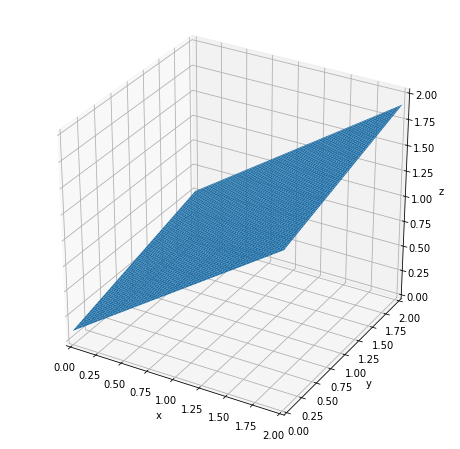

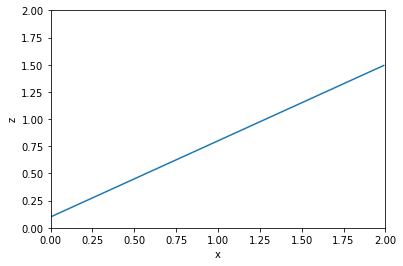

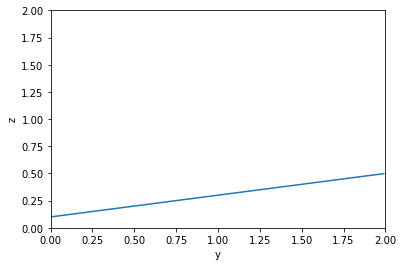

In [ ]:
x = np.linspace(0,2,100)
y = np.linspace(0, 2,100)

a=0.7 #@param {type:"slider", min:0, max:3, step:0.1}
b= 0.2 #@param {type:"slider", min:0, max:3, step:0.1}
c = 0.1#@param {type:"slider", min:0, max:0.5, step:0.1}
X,Y = np.meshgrid(x,y)
Z= a*X +b*Y + c

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
plt.xlim(0, 2)  
plt.ylim(0, 2)

surf = ax.plot_surface(X, Y, Z)
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel('z')
ax.set_zlim(0,2)

plt.show()


# lines obtained by projecting the plane Z on vertical planes

xs = np.arange(0, 2, step=0.01)
zs = a*xs + c
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel("x")
plt.ylabel("z")

plt.plot(xs, zs)
plt.show()

ys = np.arange(0, 2, step=0.01)
zs = b*ys +c 
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel("y")
plt.ylabel("z")

plt.plot(ys, zs)
plt.show()

# Stima dei costi dell'assicurazione medica

Questa sezione applicherà la stessa matematica discussa prima a un problema in cui i punti vivono in uno spazio con molte dimensioni. Mentre nel problema prima i punti vivevano nello spazio bidimensionale, ora ci sono molti valori $x_i$ per ogni punto che possono essere usati per prevedere il valore $y$ per quel punto.

Questo set di dati contiene le seguenti informazioni su ciascuna persona:

- `age`: età del beneficiario principale.

- `sex`: sesso del beneficiario dell'assicurazione, femmina, maschio.

- `bmi`: indice di massa corporea, che determina se il peso è basso o alto rispetto all'altezza,
indice obiettivo del peso corporeo (kg / m ^ 2) calcolato come il rapporto tra peso e altezza al quadrato, idealmente da 18,5 a 24,9

- `children`: numero di figli coperti dall'assicurazione sanitaria / numero di persone a carico

- `smoker`: la persona fuma?

- `region`: l'area residenziale del beneficiario negli Stati Uniti, nord-est, sud-est, sud-ovest, nord-ovest.

- `charges`: spese mediche individuali richieste dall'assicurazione sanitaria

Il valore finale `charges` è il valore $y$ che vogliamo prevedere, tutti gli altri valori verranno utilizzati come valori $x_i$, input per il nostro modello lineare.


In [ ]:
#@title DATI
data_csv = \
"""age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.924
18,male,33.77,1,no,southeast,1725.5523
28,male,33,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.47061
32,male,28.88,0,no,northwest,3866.8552
31,female,25.74,0,no,southeast,3756.6216
46,female,33.44,1,no,southeast,8240.5896
37,female,27.74,3,no,northwest,7281.5056
37,male,29.83,2,no,northeast,6406.4107
60,female,25.84,0,no,northwest,28923.13692
25,male,26.22,0,no,northeast,2721.3208
62,female,26.29,0,yes,southeast,27808.7251
23,male,34.4,0,no,southwest,1826.843
56,female,39.82,0,no,southeast,11090.7178
27,male,42.13,0,yes,southeast,39611.7577
19,male,24.6,1,no,southwest,1837.237
52,female,30.78,1,no,northeast,10797.3362
23,male,23.845,0,no,northeast,2395.17155
56,male,40.3,0,no,southwest,10602.385
30,male,35.3,0,yes,southwest,36837.467
60,female,36.005,0,no,northeast,13228.84695
30,female,32.4,1,no,southwest,4149.736
18,male,34.1,0,no,southeast,1137.011
34,female,31.92,1,yes,northeast,37701.8768
37,male,28.025,2,no,northwest,6203.90175
59,female,27.72,3,no,southeast,14001.1338
63,female,23.085,0,no,northeast,14451.83515
55,female,32.775,2,no,northwest,12268.63225
23,male,17.385,1,no,northwest,2775.19215
31,male,36.3,2,yes,southwest,38711
22,male,35.6,0,yes,southwest,35585.576
18,female,26.315,0,no,northeast,2198.18985
19,female,28.6,5,no,southwest,4687.797
63,male,28.31,0,no,northwest,13770.0979
28,male,36.4,1,yes,southwest,51194.55914
19,male,20.425,0,no,northwest,1625.43375
62,female,32.965,3,no,northwest,15612.19335
26,male,20.8,0,no,southwest,2302.3
35,male,36.67,1,yes,northeast,39774.2763
60,male,39.9,0,yes,southwest,48173.361
24,female,26.6,0,no,northeast,3046.062
31,female,36.63,2,no,southeast,4949.7587
41,male,21.78,1,no,southeast,6272.4772
37,female,30.8,2,no,southeast,6313.759
38,male,37.05,1,no,northeast,6079.6715
55,male,37.3,0,no,southwest,20630.28351
18,female,38.665,2,no,northeast,3393.35635
28,female,34.77,0,no,northwest,3556.9223
60,female,24.53,0,no,southeast,12629.8967
36,male,35.2,1,yes,southeast,38709.176
18,female,35.625,0,no,northeast,2211.13075
21,female,33.63,2,no,northwest,3579.8287
48,male,28,1,yes,southwest,23568.272
36,male,34.43,0,yes,southeast,37742.5757
40,female,28.69,3,no,northwest,8059.6791
58,male,36.955,2,yes,northwest,47496.49445
58,female,31.825,2,no,northeast,13607.36875
18,male,31.68,2,yes,southeast,34303.1672
53,female,22.88,1,yes,southeast,23244.7902
34,female,37.335,2,no,northwest,5989.52365
43,male,27.36,3,no,northeast,8606.2174
25,male,33.66,4,no,southeast,4504.6624
64,male,24.7,1,no,northwest,30166.61817
28,female,25.935,1,no,northwest,4133.64165
20,female,22.42,0,yes,northwest,14711.7438
19,female,28.9,0,no,southwest,1743.214
61,female,39.1,2,no,southwest,14235.072
40,male,26.315,1,no,northwest,6389.37785
40,female,36.19,0,no,southeast,5920.1041
28,male,23.98,3,yes,southeast,17663.1442
27,female,24.75,0,yes,southeast,16577.7795
31,male,28.5,5,no,northeast,6799.458
53,female,28.1,3,no,southwest,11741.726
58,male,32.01,1,no,southeast,11946.6259
44,male,27.4,2,no,southwest,7726.854
57,male,34.01,0,no,northwest,11356.6609
29,female,29.59,1,no,southeast,3947.4131
21,male,35.53,0,no,southeast,1532.4697
22,female,39.805,0,no,northeast,2755.02095
41,female,32.965,0,no,northwest,6571.02435
31,male,26.885,1,no,northeast,4441.21315
45,female,38.285,0,no,northeast,7935.29115
22,male,37.62,1,yes,southeast,37165.1638
48,female,41.23,4,no,northwest,11033.6617
37,female,34.8,2,yes,southwest,39836.519
45,male,22.895,2,yes,northwest,21098.55405
57,female,31.16,0,yes,northwest,43578.9394
56,female,27.2,0,no,southwest,11073.176
46,female,27.74,0,no,northwest,8026.6666
55,female,26.98,0,no,northwest,11082.5772
21,female,39.49,0,no,southeast,2026.9741
53,female,24.795,1,no,northwest,10942.13205
59,male,29.83,3,yes,northeast,30184.9367
35,male,34.77,2,no,northwest,5729.0053
64,female,31.3,2,yes,southwest,47291.055
28,female,37.62,1,no,southeast,3766.8838
54,female,30.8,3,no,southwest,12105.32
55,male,38.28,0,no,southeast,10226.2842
56,male,19.95,0,yes,northeast,22412.6485
38,male,19.3,0,yes,southwest,15820.699
41,female,31.6,0,no,southwest,6186.127
30,male,25.46,0,no,northeast,3645.0894
18,female,30.115,0,no,northeast,21344.8467
61,female,29.92,3,yes,southeast,30942.1918
34,female,27.5,1,no,southwest,5003.853
20,male,28.025,1,yes,northwest,17560.37975
19,female,28.4,1,no,southwest,2331.519
26,male,30.875,2,no,northwest,3877.30425
29,male,27.94,0,no,southeast,2867.1196
63,male,35.09,0,yes,southeast,47055.5321
54,male,33.63,1,no,northwest,10825.2537
55,female,29.7,2,no,southwest,11881.358
37,male,30.8,0,no,southwest,4646.759
21,female,35.72,0,no,northwest,2404.7338
52,male,32.205,3,no,northeast,11488.31695
60,male,28.595,0,no,northeast,30259.99556
58,male,49.06,0,no,southeast,11381.3254
29,female,27.94,1,yes,southeast,19107.7796
49,female,27.17,0,no,southeast,8601.3293
37,female,23.37,2,no,northwest,6686.4313
44,male,37.1,2,no,southwest,7740.337
18,male,23.75,0,no,northeast,1705.6245
20,female,28.975,0,no,northwest,2257.47525
44,male,31.35,1,yes,northeast,39556.4945
47,female,33.915,3,no,northwest,10115.00885
26,female,28.785,0,no,northeast,3385.39915
19,female,28.3,0,yes,southwest,17081.08
52,female,37.4,0,no,southwest,9634.538
32,female,17.765,2,yes,northwest,32734.1863
38,male,34.7,2,no,southwest,6082.405
59,female,26.505,0,no,northeast,12815.44495
61,female,22.04,0,no,northeast,13616.3586
53,female,35.9,2,no,southwest,11163.568
19,male,25.555,0,no,northwest,1632.56445
20,female,28.785,0,no,northeast,2457.21115
22,female,28.05,0,no,southeast,2155.6815
19,male,34.1,0,no,southwest,1261.442
22,male,25.175,0,no,northwest,2045.68525
54,female,31.9,3,no,southeast,27322.73386
22,female,36,0,no,southwest,2166.732
34,male,22.42,2,no,northeast,27375.90478
26,male,32.49,1,no,northeast,3490.5491
34,male,25.3,2,yes,southeast,18972.495
29,male,29.735,2,no,northwest,18157.876
30,male,28.69,3,yes,northwest,20745.9891
29,female,38.83,3,no,southeast,5138.2567
46,male,30.495,3,yes,northwest,40720.55105
51,female,37.73,1,no,southeast,9877.6077
53,female,37.43,1,no,northwest,10959.6947
19,male,28.4,1,no,southwest,1842.519
35,male,24.13,1,no,northwest,5125.2157
48,male,29.7,0,no,southeast,7789.635
32,female,37.145,3,no,northeast,6334.34355
42,female,23.37,0,yes,northeast,19964.7463
40,female,25.46,1,no,northeast,7077.1894
44,male,39.52,0,no,northwest,6948.7008
48,male,24.42,0,yes,southeast,21223.6758
18,male,25.175,0,yes,northeast,15518.18025
30,male,35.53,0,yes,southeast,36950.2567
50,female,27.83,3,no,southeast,19749.38338
42,female,26.6,0,yes,northwest,21348.706
18,female,36.85,0,yes,southeast,36149.4835
54,male,39.6,1,no,southwest,10450.552
32,female,29.8,2,no,southwest,5152.134
37,male,29.64,0,no,northwest,5028.1466
47,male,28.215,4,no,northeast,10407.08585
20,female,37,5,no,southwest,4830.63
32,female,33.155,3,no,northwest,6128.79745
19,female,31.825,1,no,northwest,2719.27975
27,male,18.905,3,no,northeast,4827.90495
63,male,41.47,0,no,southeast,13405.3903
49,male,30.3,0,no,southwest,8116.68
18,male,15.96,0,no,northeast,1694.7964
35,female,34.8,1,no,southwest,5246.047
24,female,33.345,0,no,northwest,2855.43755
63,female,37.7,0,yes,southwest,48824.45
38,male,27.835,2,no,northwest,6455.86265
54,male,29.2,1,no,southwest,10436.096
46,female,28.9,2,no,southwest,8823.279
41,female,33.155,3,no,northeast,8538.28845
58,male,28.595,0,no,northwest,11735.87905
18,female,38.28,0,no,southeast,1631.8212
22,male,19.95,3,no,northeast,4005.4225
44,female,26.41,0,no,northwest,7419.4779
44,male,30.69,2,no,southeast,7731.4271
36,male,41.895,3,yes,northeast,43753.33705
26,female,29.92,2,no,southeast,3981.9768
30,female,30.9,3,no,southwest,5325.651
41,female,32.2,1,no,southwest,6775.961
29,female,32.11,2,no,northwest,4922.9159
61,male,31.57,0,no,southeast,12557.6053
36,female,26.2,0,no,southwest,4883.866
25,male,25.74,0,no,southeast,2137.6536
56,female,26.6,1,no,northwest,12044.342
18,male,34.43,0,no,southeast,1137.4697
19,male,30.59,0,no,northwest,1639.5631
39,female,32.8,0,no,southwest,5649.715
45,female,28.6,2,no,southeast,8516.829
51,female,18.05,0,no,northwest,9644.2525
64,female,39.33,0,no,northeast,14901.5167
19,female,32.11,0,no,northwest,2130.6759
48,female,32.23,1,no,southeast,8871.1517
60,female,24.035,0,no,northwest,13012.20865
27,female,36.08,0,yes,southeast,37133.8982
46,male,22.3,0,no,southwest,7147.105
28,female,28.88,1,no,northeast,4337.7352
59,male,26.4,0,no,southeast,11743.299
35,male,27.74,2,yes,northeast,20984.0936
63,female,31.8,0,no,southwest,13880.949
40,male,41.23,1,no,northeast,6610.1097
20,male,33,1,no,southwest,1980.07
40,male,30.875,4,no,northwest,8162.71625
24,male,28.5,2,no,northwest,3537.703
34,female,26.73,1,no,southeast,5002.7827
45,female,30.9,2,no,southwest,8520.026
41,female,37.1,2,no,southwest,7371.772
53,female,26.6,0,no,northwest,10355.641
27,male,23.1,0,no,southeast,2483.736
26,female,29.92,1,no,southeast,3392.9768
24,female,23.21,0,no,southeast,25081.76784
34,female,33.7,1,no,southwest,5012.471
53,female,33.25,0,no,northeast,10564.8845
32,male,30.8,3,no,southwest,5253.524
19,male,34.8,0,yes,southwest,34779.615
42,male,24.64,0,yes,southeast,19515.5416
55,male,33.88,3,no,southeast,11987.1682
28,male,38.06,0,no,southeast,2689.4954
58,female,41.91,0,no,southeast,24227.33724
41,female,31.635,1,no,northeast,7358.17565
47,male,25.46,2,no,northeast,9225.2564
42,female,36.195,1,no,northwest,7443.64305
59,female,27.83,3,no,southeast,14001.2867
19,female,17.8,0,no,southwest,1727.785
59,male,27.5,1,no,southwest,12333.828
39,male,24.51,2,no,northwest,6710.1919
40,female,22.22,2,yes,southeast,19444.2658
18,female,26.73,0,no,southeast,1615.7667
31,male,38.39,2,no,southeast,4463.2051
19,male,29.07,0,yes,northwest,17352.6803
44,male,38.06,1,no,southeast,7152.6714
23,female,36.67,2,yes,northeast,38511.6283
33,female,22.135,1,no,northeast,5354.07465
55,female,26.8,1,no,southwest,35160.13457
40,male,35.3,3,no,southwest,7196.867
63,female,27.74,0,yes,northeast,29523.1656
54,male,30.02,0,no,northwest,24476.47851
60,female,38.06,0,no,southeast,12648.7034
24,male,35.86,0,no,southeast,1986.9334
19,male,20.9,1,no,southwest,1832.094
29,male,28.975,1,no,northeast,4040.55825
18,male,17.29,2,yes,northeast,12829.4551
63,female,32.2,2,yes,southwest,47305.305
54,male,34.21,2,yes,southeast,44260.7499
27,male,30.3,3,no,southwest,4260.744
50,male,31.825,0,yes,northeast,41097.16175
55,female,25.365,3,no,northeast,13047.33235
56,male,33.63,0,yes,northwest,43921.1837
38,female,40.15,0,no,southeast,5400.9805
51,male,24.415,4,no,northwest,11520.09985
19,male,31.92,0,yes,northwest,33750.2918
58,female,25.2,0,no,southwest,11837.16
20,female,26.84,1,yes,southeast,17085.2676
52,male,24.32,3,yes,northeast,24869.8368
19,male,36.955,0,yes,northwest,36219.40545
53,female,38.06,3,no,southeast,20462.99766
46,male,42.35,3,yes,southeast,46151.1245
40,male,19.8,1,yes,southeast,17179.522
59,female,32.395,3,no,northeast,14590.63205
45,male,30.2,1,no,southwest,7441.053
49,male,25.84,1,no,northeast,9282.4806
18,male,29.37,1,no,southeast,1719.4363
50,male,34.2,2,yes,southwest,42856.838
41,male,37.05,2,no,northwest,7265.7025
50,male,27.455,1,no,northeast,9617.66245
25,male,27.55,0,no,northwest,2523.1695
47,female,26.6,2,no,northeast,9715.841
19,male,20.615,2,no,northwest,2803.69785
22,female,24.3,0,no,southwest,2150.469
59,male,31.79,2,no,southeast,12928.7911
51,female,21.56,1,no,southeast,9855.1314
40,female,28.12,1,yes,northeast,22331.5668
54,male,40.565,3,yes,northeast,48549.17835
30,male,27.645,1,no,northeast,4237.12655
55,female,32.395,1,no,northeast,11879.10405
52,female,31.2,0,no,southwest,9625.92
46,male,26.62,1,no,southeast,7742.1098
46,female,48.07,2,no,northeast,9432.9253
63,female,26.22,0,no,northwest,14256.1928
59,female,36.765,1,yes,northeast,47896.79135
52,male,26.4,3,no,southeast,25992.82104
28,female,33.4,0,no,southwest,3172.018
29,male,29.64,1,no,northeast,20277.80751
25,male,45.54,2,yes,southeast,42112.2356
22,female,28.82,0,no,southeast,2156.7518
25,male,26.8,3,no,southwest,3906.127
18,male,22.99,0,no,northeast,1704.5681
19,male,27.7,0,yes,southwest,16297.846
47,male,25.41,1,yes,southeast,21978.6769
31,male,34.39,3,yes,northwest,38746.3551
48,female,28.88,1,no,northwest,9249.4952
36,male,27.55,3,no,northeast,6746.7425
53,female,22.61,3,yes,northeast,24873.3849
56,female,37.51,2,no,southeast,12265.5069
28,female,33,2,no,southeast,4349.462
57,female,38,2,no,southwest,12646.207
29,male,33.345,2,no,northwest,19442.3535
28,female,27.5,2,no,southwest,20177.67113
30,female,33.33,1,no,southeast,4151.0287
58,male,34.865,0,no,northeast,11944.59435
41,female,33.06,2,no,northwest,7749.1564
50,male,26.6,0,no,southwest,8444.474
19,female,24.7,0,no,southwest,1737.376
43,male,35.97,3,yes,southeast,42124.5153
49,male,35.86,0,no,southeast,8124.4084
27,female,31.4,0,yes,southwest,34838.873
52,male,33.25,0,no,northeast,9722.7695
50,male,32.205,0,no,northwest,8835.26495
54,male,32.775,0,no,northeast,10435.06525
44,female,27.645,0,no,northwest,7421.19455
32,male,37.335,1,no,northeast,4667.60765
34,male,25.27,1,no,northwest,4894.7533
26,female,29.64,4,no,northeast,24671.66334
34,male,30.8,0,yes,southwest,35491.64
57,male,40.945,0,no,northeast,11566.30055
29,male,27.2,0,no,southwest,2866.091
40,male,34.105,1,no,northeast,6600.20595
27,female,23.21,1,no,southeast,3561.8889
45,male,36.48,2,yes,northwest,42760.5022
64,female,33.8,1,yes,southwest,47928.03
52,male,36.7,0,no,southwest,9144.565
61,female,36.385,1,yes,northeast,48517.56315
52,male,27.36,0,yes,northwest,24393.6224
61,female,31.16,0,no,northwest,13429.0354
56,female,28.785,0,no,northeast,11658.37915
43,female,35.72,2,no,northeast,19144.57652
64,male,34.5,0,no,southwest,13822.803
60,male,25.74,0,no,southeast,12142.5786
62,male,27.55,1,no,northwest,13937.6665
50,male,32.3,1,yes,northeast,41919.097
46,female,27.72,1,no,southeast,8232.6388
24,female,27.6,0,no,southwest,18955.22017
62,male,30.02,0,no,northwest,13352.0998
60,female,27.55,0,no,northeast,13217.0945
63,male,36.765,0,no,northeast,13981.85035
49,female,41.47,4,no,southeast,10977.2063
34,female,29.26,3,no,southeast,6184.2994
33,male,35.75,2,no,southeast,4889.9995
46,male,33.345,1,no,northeast,8334.45755
36,female,29.92,1,no,southeast,5478.0368
19,male,27.835,0,no,northwest,1635.73365
57,female,23.18,0,no,northwest,11830.6072
50,female,25.6,0,no,southwest,8932.084
30,female,27.7,0,no,southwest,3554.203
33,male,35.245,0,no,northeast,12404.8791
18,female,38.28,0,no,southeast,14133.03775
46,male,27.6,0,no,southwest,24603.04837
46,male,43.89,3,no,southeast,8944.1151
47,male,29.83,3,no,northwest,9620.3307
23,male,41.91,0,no,southeast,1837.2819
18,female,20.79,0,no,southeast,1607.5101
48,female,32.3,2,no,northeast,10043.249
35,male,30.5,1,no,southwest,4751.07
19,female,21.7,0,yes,southwest,13844.506
21,female,26.4,1,no,southwest,2597.779
21,female,21.89,2,no,southeast,3180.5101
49,female,30.78,1,no,northeast,9778.3472
56,female,32.3,3,no,northeast,13430.265
42,female,24.985,2,no,northwest,8017.06115
44,male,32.015,2,no,northwest,8116.26885
18,male,30.4,3,no,northeast,3481.868
61,female,21.09,0,no,northwest,13415.0381
57,female,22.23,0,no,northeast,12029.2867
42,female,33.155,1,no,northeast,7639.41745
26,male,32.9,2,yes,southwest,36085.219
20,male,33.33,0,no,southeast,1391.5287
23,female,28.31,0,yes,northwest,18033.9679
39,female,24.89,3,yes,northeast,21659.9301
24,male,40.15,0,yes,southeast,38126.2465
64,female,30.115,3,no,northwest,16455.70785
62,male,31.46,1,no,southeast,27000.98473
27,female,17.955,2,yes,northeast,15006.57945
55,male,30.685,0,yes,northeast,42303.69215
55,male,33,0,no,southeast,20781.48892
35,female,43.34,2,no,southeast,5846.9176
44,male,22.135,2,no,northeast,8302.53565
19,male,34.4,0,no,southwest,1261.859
58,female,39.05,0,no,southeast,11856.4115
50,male,25.365,2,no,northwest,30284.64294
26,female,22.61,0,no,northwest,3176.8159
24,female,30.21,3,no,northwest,4618.0799
48,male,35.625,4,no,northeast,10736.87075
19,female,37.43,0,no,northwest,2138.0707
48,male,31.445,1,no,northeast,8964.06055
49,male,31.35,1,no,northeast,9290.1395
46,female,32.3,2,no,northeast,9411.005
46,male,19.855,0,no,northwest,7526.70645
43,female,34.4,3,no,southwest,8522.003
21,male,31.02,0,no,southeast,16586.49771
64,male,25.6,2,no,southwest,14988.432
18,female,38.17,0,no,southeast,1631.6683
51,female,20.6,0,no,southwest,9264.797
47,male,47.52,1,no,southeast,8083.9198
64,female,32.965,0,no,northwest,14692.66935
49,male,32.3,3,no,northwest,10269.46
31,male,20.4,0,no,southwest,3260.199
52,female,38.38,2,no,northeast,11396.9002
33,female,24.31,0,no,southeast,4185.0979
47,female,23.6,1,no,southwest,8539.671
38,male,21.12,3,no,southeast,6652.5288
32,male,30.03,1,no,southeast,4074.4537
19,male,17.48,0,no,northwest,1621.3402
44,female,20.235,1,yes,northeast,19594.80965
26,female,17.195,2,yes,northeast,14455.64405
25,male,23.9,5,no,southwest,5080.096
19,female,35.15,0,no,northwest,2134.9015
43,female,35.64,1,no,southeast,7345.7266
52,male,34.1,0,no,southeast,9140.951
36,female,22.6,2,yes,southwest,18608.262
64,male,39.16,1,no,southeast,14418.2804
63,female,26.98,0,yes,northwest,28950.4692
64,male,33.88,0,yes,southeast,46889.2612
61,male,35.86,0,yes,southeast,46599.1084
40,male,32.775,1,yes,northeast,39125.33225
25,male,30.59,0,no,northeast,2727.3951
48,male,30.2,2,no,southwest,8968.33
45,male,24.31,5,no,southeast,9788.8659
38,female,27.265,1,no,northeast,6555.07035
18,female,29.165,0,no,northeast,7323.734819
21,female,16.815,1,no,northeast,3167.45585
27,female,30.4,3,no,northwest,18804.7524
19,male,33.1,0,no,southwest,23082.95533
29,female,20.235,2,no,northwest,4906.40965
42,male,26.9,0,no,southwest,5969.723
60,female,30.5,0,no,southwest,12638.195
31,male,28.595,1,no,northwest,4243.59005
60,male,33.11,3,no,southeast,13919.8229
22,male,31.73,0,no,northeast,2254.7967
35,male,28.9,3,no,southwest,5926.846
52,female,46.75,5,no,southeast,12592.5345
26,male,29.45,0,no,northeast,2897.3235
31,female,32.68,1,no,northwest,4738.2682
33,female,33.5,0,yes,southwest,37079.372
18,male,43.01,0,no,southeast,1149.3959
59,female,36.52,1,no,southeast,28287.89766
56,male,26.695,1,yes,northwest,26109.32905
45,female,33.1,0,no,southwest,7345.084
60,male,29.64,0,no,northeast,12730.9996
56,female,25.65,0,no,northwest,11454.0215
40,female,29.6,0,no,southwest,5910.944
35,male,38.6,1,no,southwest,4762.329
39,male,29.6,4,no,southwest,7512.267
30,male,24.13,1,no,northwest,4032.2407
24,male,23.4,0,no,southwest,1969.614
20,male,29.735,0,no,northwest,1769.53165
32,male,46.53,2,no,southeast,4686.3887
59,male,37.4,0,no,southwest,21797.0004
55,female,30.14,2,no,southeast,11881.9696
57,female,30.495,0,no,northwest,11840.77505
56,male,39.6,0,no,southwest,10601.412
40,female,33,3,no,southeast,7682.67
49,female,36.63,3,no,southeast,10381.4787
42,male,30,0,yes,southwest,22144.032
62,female,38.095,2,no,northeast,15230.32405
56,male,25.935,0,no,northeast,11165.41765
19,male,25.175,0,no,northwest,1632.03625
30,female,28.38,1,yes,southeast,19521.9682
60,female,28.7,1,no,southwest,13224.693
56,female,33.82,2,no,northwest,12643.3778
28,female,24.32,1,no,northeast,23288.9284
18,female,24.09,1,no,southeast,2201.0971
27,male,32.67,0,no,southeast,2497.0383
18,female,30.115,0,no,northeast,2203.47185
19,female,29.8,0,no,southwest,1744.465
47,female,33.345,0,no,northeast,20878.78443
54,male,25.1,3,yes,southwest,25382.297
61,male,28.31,1,yes,northwest,28868.6639
24,male,28.5,0,yes,northeast,35147.52848
25,male,35.625,0,no,northwest,2534.39375
21,male,36.85,0,no,southeast,1534.3045
23,male,32.56,0,no,southeast,1824.2854
63,male,41.325,3,no,northwest,15555.18875
49,male,37.51,2,no,southeast,9304.7019
18,female,31.35,0,no,southeast,1622.1885
51,female,39.5,1,no,southwest,9880.068
48,male,34.3,3,no,southwest,9563.029
31,female,31.065,0,no,northeast,4347.02335
54,female,21.47,3,no,northwest,12475.3513
19,male,28.7,0,no,southwest,1253.936
44,female,38.06,0,yes,southeast,48885.13561
53,male,31.16,1,no,northwest,10461.9794
19,female,32.9,0,no,southwest,1748.774
61,female,25.08,0,no,southeast,24513.09126
18,female,25.08,0,no,northeast,2196.4732
61,male,43.4,0,no,southwest,12574.049
21,male,25.7,4,yes,southwest,17942.106
20,male,27.93,0,no,northeast,1967.0227
31,female,23.6,2,no,southwest,4931.647
45,male,28.7,2,no,southwest,8027.968
44,female,23.98,2,no,southeast,8211.1002
62,female,39.2,0,no,southwest,13470.86
29,male,34.4,0,yes,southwest,36197.699
43,male,26.03,0,no,northeast,6837.3687
51,male,23.21,1,yes,southeast,22218.1149
19,male,30.25,0,yes,southeast,32548.3405
38,female,28.93,1,no,southeast,5974.3847
37,male,30.875,3,no,northwest,6796.86325
22,male,31.35,1,no,northwest,2643.2685
21,male,23.75,2,no,northwest,3077.0955
24,female,25.27,0,no,northeast,3044.2133
57,female,28.7,0,no,southwest,11455.28
56,male,32.11,1,no,northeast,11763.0009
27,male,33.66,0,no,southeast,2498.4144
51,male,22.42,0,no,northeast,9361.3268
19,male,30.4,0,no,southwest,1256.299
39,male,28.3,1,yes,southwest,21082.16
58,male,35.7,0,no,southwest,11362.755
20,male,35.31,1,no,southeast,27724.28875
45,male,30.495,2,no,northwest,8413.46305
35,female,31,1,no,southwest,5240.765
31,male,30.875,0,no,northeast,3857.75925
50,female,27.36,0,no,northeast,25656.57526
32,female,44.22,0,no,southeast,3994.1778
51,female,33.915,0,no,northeast,9866.30485
38,female,37.73,0,no,southeast,5397.6167
42,male,26.07,1,yes,southeast,38245.59327
18,female,33.88,0,no,southeast,11482.63485
19,female,30.59,2,no,northwest,24059.68019
51,female,25.8,1,no,southwest,9861.025
46,male,39.425,1,no,northeast,8342.90875
18,male,25.46,0,no,northeast,1708.0014
57,male,42.13,1,yes,southeast,48675.5177
62,female,31.73,0,no,northeast,14043.4767
59,male,29.7,2,no,southeast,12925.886
37,male,36.19,0,no,southeast,19214.70553
64,male,40.48,0,no,southeast,13831.1152
38,male,28.025,1,no,northeast,6067.12675
33,female,38.9,3,no,southwest,5972.378
46,female,30.2,2,no,southwest,8825.086
46,female,28.05,1,no,southeast,8233.0975
53,male,31.35,0,no,southeast,27346.04207
34,female,38,3,no,southwest,6196.448
20,female,31.79,2,no,southeast,3056.3881
63,female,36.3,0,no,southeast,13887.204
54,female,47.41,0,yes,southeast,63770.42801
54,male,30.21,0,no,northwest,10231.4999
49,male,25.84,2,yes,northwest,23807.2406
28,male,35.435,0,no,northeast,3268.84665
54,female,46.7,2,no,southwest,11538.421
25,female,28.595,0,no,northeast,3213.62205
43,female,46.2,0,yes,southeast,45863.205
63,male,30.8,0,no,southwest,13390.559
32,female,28.93,0,no,southeast,3972.9247
62,male,21.4,0,no,southwest,12957.118
52,female,31.73,2,no,northwest,11187.6567
25,female,41.325,0,no,northeast,17878.90068
28,male,23.8,2,no,southwest,3847.674
46,male,33.44,1,no,northeast,8334.5896
34,male,34.21,0,no,southeast,3935.1799
35,female,34.105,3,yes,northwest,39983.42595
19,male,35.53,0,no,northwest,1646.4297
46,female,19.95,2,no,northwest,9193.8385
54,female,32.68,0,no,northeast,10923.9332
27,male,30.5,0,no,southwest,2494.022
50,male,44.77,1,no,southeast,9058.7303
18,female,32.12,2,no,southeast,2801.2588
19,female,30.495,0,no,northwest,2128.43105
38,female,40.565,1,no,northwest,6373.55735
41,male,30.59,2,no,northwest,7256.7231
49,female,31.9,5,no,southwest,11552.904
48,male,40.565,2,yes,northwest,45702.02235
31,female,29.1,0,no,southwest,3761.292
18,female,37.29,1,no,southeast,2219.4451
30,female,43.12,2,no,southeast,4753.6368
62,female,36.86,1,no,northeast,31620.00106
57,female,34.295,2,no,northeast,13224.05705
58,female,27.17,0,no,northwest,12222.8983
22,male,26.84,0,no,southeast,1664.9996
31,female,38.095,1,yes,northeast,58571.07448
52,male,30.2,1,no,southwest,9724.53
25,female,23.465,0,no,northeast,3206.49135
59,male,25.46,1,no,northeast,12913.9924
19,male,30.59,0,no,northwest,1639.5631
39,male,45.43,2,no,southeast,6356.2707
32,female,23.65,1,no,southeast,17626.23951
19,male,20.7,0,no,southwest,1242.816
33,female,28.27,1,no,southeast,4779.6023
21,male,20.235,3,no,northeast,3861.20965
34,female,30.21,1,yes,northwest,43943.8761
61,female,35.91,0,no,northeast,13635.6379
38,female,30.69,1,no,southeast,5976.8311
58,female,29,0,no,southwest,11842.442
47,male,19.57,1,no,northwest,8428.0693
20,male,31.13,2,no,southeast,2566.4707
21,female,21.85,1,yes,northeast,15359.1045
41,male,40.26,0,no,southeast,5709.1644
46,female,33.725,1,no,northeast,8823.98575
42,female,29.48,2,no,southeast,7640.3092
34,female,33.25,1,no,northeast,5594.8455
43,male,32.6,2,no,southwest,7441.501
52,female,37.525,2,no,northwest,33471.97189
18,female,39.16,0,no,southeast,1633.0444
51,male,31.635,0,no,northwest,9174.13565
56,female,25.3,0,no,southwest,11070.535
64,female,39.05,3,no,southeast,16085.1275
19,female,28.31,0,yes,northwest,17468.9839
51,female,34.1,0,no,southeast,9283.562
27,female,25.175,0,no,northeast,3558.62025
59,female,23.655,0,yes,northwest,25678.77845
28,male,26.98,2,no,northeast,4435.0942
30,male,37.8,2,yes,southwest,39241.442
47,female,29.37,1,no,southeast,8547.6913
38,female,34.8,2,no,southwest,6571.544
18,female,33.155,0,no,northeast,2207.69745
34,female,19,3,no,northeast,6753.038
20,female,33,0,no,southeast,1880.07
47,female,36.63,1,yes,southeast,42969.8527
56,female,28.595,0,no,northeast,11658.11505
49,male,25.6,2,yes,southwest,23306.547
19,female,33.11,0,yes,southeast,34439.8559
55,female,37.1,0,no,southwest,10713.644
30,male,31.4,1,no,southwest,3659.346
37,male,34.1,4,yes,southwest,40182.246
49,female,21.3,1,no,southwest,9182.17
18,male,33.535,0,yes,northeast,34617.84065
59,male,28.785,0,no,northwest,12129.61415
29,female,26.03,0,no,northwest,3736.4647
36,male,28.88,3,no,northeast,6748.5912
33,male,42.46,1,no,southeast,11326.71487
58,male,38,0,no,southwest,11365.952
44,female,38.95,0,yes,northwest,42983.4585
53,male,36.1,1,no,southwest,10085.846
24,male,29.3,0,no,southwest,1977.815
29,female,35.53,0,no,southeast,3366.6697
40,male,22.705,2,no,northeast,7173.35995
51,male,39.7,1,no,southwest,9391.346
64,male,38.19,0,no,northeast,14410.9321
19,female,24.51,1,no,northwest,2709.1119
35,female,38.095,2,no,northeast,24915.04626
39,male,26.41,0,yes,northeast,20149.3229
56,male,33.66,4,no,southeast,12949.1554
33,male,42.4,5,no,southwest,6666.243
42,male,28.31,3,yes,northwest,32787.45859
61,male,33.915,0,no,northeast,13143.86485
23,female,34.96,3,no,northwest,4466.6214
43,male,35.31,2,no,southeast,18806.14547
48,male,30.78,3,no,northeast,10141.1362
39,male,26.22,1,no,northwest,6123.5688
40,female,23.37,3,no,northeast,8252.2843
18,male,28.5,0,no,northeast,1712.227
58,female,32.965,0,no,northeast,12430.95335
49,female,42.68,2,no,southeast,9800.8882
53,female,39.6,1,no,southeast,10579.711
48,female,31.13,0,no,southeast,8280.6227
45,female,36.3,2,no,southeast,8527.532
59,female,35.2,0,no,southeast,12244.531
52,female,25.3,2,yes,southeast,24667.419
26,female,42.4,1,no,southwest,3410.324
27,male,33.155,2,no,northwest,4058.71245
48,female,35.91,1,no,northeast,26392.26029
57,female,28.785,4,no,northeast,14394.39815
37,male,46.53,3,no,southeast,6435.6237
57,female,23.98,1,no,southeast,22192.43711
32,female,31.54,1,no,northeast,5148.5526
18,male,33.66,0,no,southeast,1136.3994
64,female,22.99,0,yes,southeast,27037.9141
43,male,38.06,2,yes,southeast,42560.4304
49,male,28.7,1,no,southwest,8703.456
40,female,32.775,2,yes,northwest,40003.33225
62,male,32.015,0,yes,northeast,45710.20785
40,female,29.81,1,no,southeast,6500.2359
30,male,31.57,3,no,southeast,4837.5823
29,female,31.16,0,no,northeast,3943.5954
36,male,29.7,0,no,southeast,4399.731
41,female,31.02,0,no,southeast,6185.3208
44,female,43.89,2,yes,southeast,46200.9851
45,male,21.375,0,no,northwest,7222.78625
55,female,40.81,3,no,southeast,12485.8009
60,male,31.35,3,yes,northwest,46130.5265
56,male,36.1,3,no,southwest,12363.547
49,female,23.18,2,no,northwest,10156.7832
21,female,17.4,1,no,southwest,2585.269
19,male,20.3,0,no,southwest,1242.26
39,male,35.3,2,yes,southwest,40103.89
53,male,24.32,0,no,northwest,9863.4718
33,female,18.5,1,no,southwest,4766.022
53,male,26.41,2,no,northeast,11244.3769
42,male,26.125,2,no,northeast,7729.64575
40,male,41.69,0,no,southeast,5438.7491
47,female,24.1,1,no,southwest,26236.57997
27,male,31.13,1,yes,southeast,34806.4677
21,male,27.36,0,no,northeast,2104.1134
47,male,36.2,1,no,southwest,8068.185
20,male,32.395,1,no,northwest,2362.22905
24,male,23.655,0,no,northwest,2352.96845
27,female,34.8,1,no,southwest,3577.999
26,female,40.185,0,no,northwest,3201.24515
53,female,32.3,2,no,northeast,29186.48236
41,male,35.75,1,yes,southeast,40273.6455
56,male,33.725,0,no,northwest,10976.24575
23,female,39.27,2,no,southeast,3500.6123
21,female,34.87,0,no,southeast,2020.5523
50,female,44.745,0,no,northeast,9541.69555
53,male,41.47,0,no,southeast,9504.3103
34,female,26.41,1,no,northwest,5385.3379
47,female,29.545,1,no,northwest,8930.93455
33,female,32.9,2,no,southwest,5375.038
51,female,38.06,0,yes,southeast,44400.4064
49,male,28.69,3,no,northwest,10264.4421
31,female,30.495,3,no,northeast,6113.23105
36,female,27.74,0,no,northeast,5469.0066
18,male,35.2,1,no,southeast,1727.54
50,female,23.54,2,no,southeast,10107.2206
43,female,30.685,2,no,northwest,8310.83915
20,male,40.47,0,no,northeast,1984.4533
24,female,22.6,0,no,southwest,2457.502
60,male,28.9,0,no,southwest,12146.971
49,female,22.61,1,no,northwest,9566.9909
60,male,24.32,1,no,northwest,13112.6048
51,female,36.67,2,no,northwest,10848.1343
58,female,33.44,0,no,northwest,12231.6136
51,female,40.66,0,no,northeast,9875.6804
53,male,36.6,3,no,southwest,11264.541
62,male,37.4,0,no,southwest,12979.358
19,male,35.4,0,no,southwest,1263.249
50,female,27.075,1,no,northeast,10106.13425
30,female,39.05,3,yes,southeast,40932.4295
41,male,28.405,1,no,northwest,6664.68595
29,female,21.755,1,yes,northeast,16657.71745
18,female,40.28,0,no,northeast,2217.6012
41,female,36.08,1,no,southeast,6781.3542
35,male,24.42,3,yes,southeast,19361.9988
53,male,21.4,1,no,southwest,10065.413
24,female,30.1,3,no,southwest,4234.927
48,female,27.265,1,no,northeast,9447.25035
59,female,32.1,3,no,southwest,14007.222
49,female,34.77,1,no,northwest,9583.8933
37,female,38.39,0,yes,southeast,40419.0191
26,male,23.7,2,no,southwest,3484.331
23,male,31.73,3,yes,northeast,36189.1017
29,male,35.5,2,yes,southwest,44585.45587
45,male,24.035,2,no,northeast,8604.48365
27,male,29.15,0,yes,southeast,18246.4955
53,male,34.105,0,yes,northeast,43254.41795
31,female,26.62,0,no,southeast,3757.8448
50,male,26.41,0,no,northwest,8827.2099
50,female,30.115,1,no,northwest,9910.35985
34,male,27,2,no,southwest,11737.84884
19,male,21.755,0,no,northwest,1627.28245
47,female,36,1,no,southwest,8556.907
28,male,30.875,0,no,northwest,3062.50825
37,female,26.4,0,yes,southeast,19539.243
21,male,28.975,0,no,northwest,1906.35825
64,male,37.905,0,no,northwest,14210.53595
58,female,22.77,0,no,southeast,11833.7823
24,male,33.63,4,no,northeast,17128.42608
31,male,27.645,2,no,northeast,5031.26955
39,female,22.8,3,no,northeast,7985.815
47,female,27.83,0,yes,southeast,23065.4207
30,male,37.43,3,no,northeast,5428.7277
18,male,38.17,0,yes,southeast,36307.7983
22,female,34.58,2,no,northeast,3925.7582
23,male,35.2,1,no,southwest,2416.955
33,male,27.1,1,yes,southwest,19040.876
27,male,26.03,0,no,northeast,3070.8087
45,female,25.175,2,no,northeast,9095.06825
57,female,31.825,0,no,northwest,11842.62375
47,male,32.3,1,no,southwest,8062.764
42,female,29,1,no,southwest,7050.642
64,female,39.7,0,no,southwest,14319.031
38,female,19.475,2,no,northwest,6933.24225
61,male,36.1,3,no,southwest,27941.28758
53,female,26.7,2,no,southwest,11150.78
44,female,36.48,0,no,northeast,12797.20962
19,female,28.88,0,yes,northwest,17748.5062
41,male,34.2,2,no,northwest,7261.741
51,male,33.33,3,no,southeast,10560.4917
40,male,32.3,2,no,northwest,6986.697
45,male,39.805,0,no,northeast,7448.40395
35,male,34.32,3,no,southeast,5934.3798
53,male,28.88,0,no,northwest,9869.8102
30,male,24.4,3,yes,southwest,18259.216
18,male,41.14,0,no,southeast,1146.7966
51,male,35.97,1,no,southeast,9386.1613
50,female,27.6,1,yes,southwest,24520.264
31,female,29.26,1,no,southeast,4350.5144
35,female,27.7,3,no,southwest,6414.178
60,male,36.955,0,no,northeast,12741.16745
21,male,36.86,0,no,northwest,1917.3184
29,male,22.515,3,no,northeast,5209.57885
62,female,29.92,0,no,southeast,13457.9608
39,female,41.8,0,no,southeast,5662.225
19,male,27.6,0,no,southwest,1252.407
22,female,23.18,0,no,northeast,2731.9122
53,male,20.9,0,yes,southeast,21195.818
39,female,31.92,2,no,northwest,7209.4918
27,male,28.5,0,yes,northwest,18310.742
30,male,44.22,2,no,southeast,4266.1658
30,female,22.895,1,no,northeast,4719.52405
58,female,33.1,0,no,southwest,11848.141
33,male,24.795,0,yes,northeast,17904.52705
42,female,26.18,1,no,southeast,7046.7222
64,female,35.97,0,no,southeast,14313.8463
21,male,22.3,1,no,southwest,2103.08
18,female,42.24,0,yes,southeast,38792.6856
23,male,26.51,0,no,southeast,1815.8759
45,female,35.815,0,no,northwest,7731.85785
40,female,41.42,1,no,northwest,28476.73499
19,female,36.575,0,no,northwest,2136.88225
18,male,30.14,0,no,southeast,1131.5066
25,male,25.84,1,no,northeast,3309.7926
46,female,30.8,3,no,southwest,9414.92
33,female,42.94,3,no,northwest,6360.9936
54,male,21.01,2,no,southeast,11013.7119
28,male,22.515,2,no,northeast,4428.88785
36,male,34.43,2,no,southeast,5584.3057
20,female,31.46,0,no,southeast,1877.9294
24,female,24.225,0,no,northwest,2842.76075
23,male,37.1,3,no,southwest,3597.596
47,female,26.125,1,yes,northeast,23401.30575
33,female,35.53,0,yes,northwest,55135.40209
45,male,33.7,1,no,southwest,7445.918
26,male,17.67,0,no,northwest,2680.9493
18,female,31.13,0,no,southeast,1621.8827
44,female,29.81,2,no,southeast,8219.2039
60,male,24.32,0,no,northwest,12523.6048
64,female,31.825,2,no,northeast,16069.08475
56,male,31.79,2,yes,southeast,43813.8661
36,male,28.025,1,yes,northeast,20773.62775
41,male,30.78,3,yes,northeast,39597.4072
39,male,21.85,1,no,northwest,6117.4945
63,male,33.1,0,no,southwest,13393.756
36,female,25.84,0,no,northwest,5266.3656
28,female,23.845,2,no,northwest,4719.73655
58,male,34.39,0,no,northwest,11743.9341
36,male,33.82,1,no,northwest,5377.4578
42,male,35.97,2,no,southeast,7160.3303
36,male,31.5,0,no,southwest,4402.233
56,female,28.31,0,no,northeast,11657.7189
35,female,23.465,2,no,northeast,6402.29135
59,female,31.35,0,no,northwest,12622.1795
21,male,31.1,0,no,southwest,1526.312
59,male,24.7,0,no,northeast,12323.936
23,female,32.78,2,yes,southeast,36021.0112
57,female,29.81,0,yes,southeast,27533.9129
53,male,30.495,0,no,northeast,10072.05505
60,female,32.45,0,yes,southeast,45008.9555
51,female,34.2,1,no,southwest,9872.701
23,male,50.38,1,no,southeast,2438.0552
27,female,24.1,0,no,southwest,2974.126
55,male,32.775,0,no,northwest,10601.63225
37,female,30.78,0,yes,northeast,37270.1512
61,male,32.3,2,no,northwest,14119.62
46,female,35.53,0,yes,northeast,42111.6647
53,female,23.75,2,no,northeast,11729.6795
49,female,23.845,3,yes,northeast,24106.91255
20,female,29.6,0,no,southwest,1875.344
48,female,33.11,0,yes,southeast,40974.1649
25,male,24.13,0,yes,northwest,15817.9857
25,female,32.23,1,no,southeast,18218.16139
57,male,28.1,0,no,southwest,10965.446
37,female,47.6,2,yes,southwest,46113.511
38,female,28,3,no,southwest,7151.092
55,female,33.535,2,no,northwest,12269.68865
36,female,19.855,0,no,northeast,5458.04645
51,male,25.4,0,no,southwest,8782.469
40,male,29.9,2,no,southwest,6600.361
18,male,37.29,0,no,southeast,1141.4451
57,male,43.7,1,no,southwest,11576.13
61,male,23.655,0,no,northeast,13129.60345
25,female,24.3,3,no,southwest,4391.652
50,male,36.2,0,no,southwest,8457.818
26,female,29.48,1,no,southeast,3392.3652
42,male,24.86,0,no,southeast,5966.8874
43,male,30.1,1,no,southwest,6849.026
44,male,21.85,3,no,northeast,8891.1395
23,female,28.12,0,no,northwest,2690.1138
49,female,27.1,1,no,southwest,26140.3603
33,male,33.44,5,no,southeast,6653.7886
41,male,28.8,1,no,southwest,6282.235
37,female,29.5,2,no,southwest,6311.952
22,male,34.8,3,no,southwest,3443.064
23,male,27.36,1,no,northwest,2789.0574
21,female,22.135,0,no,northeast,2585.85065
51,female,37.05,3,yes,northeast,46255.1125
25,male,26.695,4,no,northwest,4877.98105
32,male,28.93,1,yes,southeast,19719.6947
57,male,28.975,0,yes,northeast,27218.43725
36,female,30.02,0,no,northwest,5272.1758
22,male,39.5,0,no,southwest,1682.597
57,male,33.63,1,no,northwest,11945.1327
64,female,26.885,0,yes,northwest,29330.98315
36,female,29.04,4,no,southeast,7243.8136
54,male,24.035,0,no,northeast,10422.91665
47,male,38.94,2,yes,southeast,44202.6536
62,male,32.11,0,no,northeast,13555.0049
61,female,44,0,no,southwest,13063.883
43,female,20.045,2,yes,northeast,19798.05455
19,male,25.555,1,no,northwest,2221.56445
18,female,40.26,0,no,southeast,1634.5734
19,female,22.515,0,no,northwest,2117.33885
49,male,22.515,0,no,northeast,8688.85885
60,male,40.92,0,yes,southeast,48673.5588
26,male,27.265,3,no,northeast,4661.28635
49,male,36.85,0,no,southeast,8125.7845
60,female,35.1,0,no,southwest,12644.589
26,female,29.355,2,no,northeast,4564.19145
27,male,32.585,3,no,northeast,4846.92015
44,female,32.34,1,no,southeast,7633.7206
63,male,39.8,3,no,southwest,15170.069
32,female,24.6,0,yes,southwest,17496.306
22,male,28.31,1,no,northwest,2639.0429
18,male,31.73,0,yes,northeast,33732.6867
59,female,26.695,3,no,northwest,14382.70905
44,female,27.5,1,no,southwest,7626.993
33,male,24.605,2,no,northwest,5257.50795
24,female,33.99,0,no,southeast,2473.3341
43,female,26.885,0,yes,northwest,21774.32215
45,male,22.895,0,yes,northeast,35069.37452
61,female,28.2,0,no,southwest,13041.921
35,female,34.21,1,no,southeast,5245.2269
62,female,25,0,no,southwest,13451.122
62,female,33.2,0,no,southwest,13462.52
38,male,31,1,no,southwest,5488.262
34,male,35.815,0,no,northwest,4320.41085
43,male,23.2,0,no,southwest,6250.435
50,male,32.11,2,no,northeast,25333.33284
19,female,23.4,2,no,southwest,2913.569
57,female,20.1,1,no,southwest,12032.326
62,female,39.16,0,no,southeast,13470.8044
41,male,34.21,1,no,southeast,6289.7549
26,male,46.53,1,no,southeast,2927.0647
39,female,32.5,1,no,southwest,6238.298
46,male,25.8,5,no,southwest,10096.97
45,female,35.3,0,no,southwest,7348.142
32,male,37.18,2,no,southeast,4673.3922
59,female,27.5,0,no,southwest,12233.828
44,male,29.735,2,no,northeast,32108.66282
39,female,24.225,5,no,northwest,8965.79575
18,male,26.18,2,no,southeast,2304.0022
53,male,29.48,0,no,southeast,9487.6442
18,male,23.21,0,no,southeast,1121.8739
50,female,46.09,1,no,southeast,9549.5651
18,female,40.185,0,no,northeast,2217.46915
19,male,22.61,0,no,northwest,1628.4709
62,male,39.93,0,no,southeast,12982.8747
56,female,35.8,1,no,southwest,11674.13
42,male,35.8,2,no,southwest,7160.094
37,male,34.2,1,yes,northeast,39047.285
42,male,31.255,0,no,northwest,6358.77645
25,male,29.7,3,yes,southwest,19933.458
57,male,18.335,0,no,northeast,11534.87265
51,male,42.9,2,yes,southeast,47462.894
30,female,28.405,1,no,northwest,4527.18295
44,male,30.2,2,yes,southwest,38998.546
34,male,27.835,1,yes,northwest,20009.63365
31,male,39.49,1,no,southeast,3875.7341
54,male,30.8,1,yes,southeast,41999.52
24,male,26.79,1,no,northwest,12609.88702
43,male,34.96,1,yes,northeast,41034.2214
48,male,36.67,1,no,northwest,28468.91901
19,female,39.615,1,no,northwest,2730.10785
29,female,25.9,0,no,southwest,3353.284
63,female,35.2,1,no,southeast,14474.675
46,male,24.795,3,no,northeast,9500.57305
52,male,36.765,2,no,northwest,26467.09737
35,male,27.1,1,no,southwest,4746.344
51,male,24.795,2,yes,northwest,23967.38305
44,male,25.365,1,no,northwest,7518.02535
21,male,25.745,2,no,northeast,3279.86855
39,female,34.32,5,no,southeast,8596.8278
50,female,28.16,3,no,southeast,10702.6424
34,female,23.56,0,no,northeast,4992.3764
22,female,20.235,0,no,northwest,2527.81865
19,female,40.5,0,no,southwest,1759.338
26,male,35.42,0,no,southeast,2322.6218
29,male,22.895,0,yes,northeast,16138.76205
48,male,40.15,0,no,southeast,7804.1605
26,male,29.15,1,no,southeast,2902.9065
45,female,39.995,3,no,northeast,9704.66805
36,female,29.92,0,no,southeast,4889.0368
54,male,25.46,1,no,northeast,25517.11363
34,male,21.375,0,no,northeast,4500.33925
31,male,25.9,3,yes,southwest,19199.944
27,female,30.59,1,no,northeast,16796.41194
20,male,30.115,5,no,northeast,4915.05985
44,female,25.8,1,no,southwest,7624.63
43,male,30.115,3,no,northwest,8410.04685
45,female,27.645,1,no,northwest,28340.18885
34,male,34.675,0,no,northeast,4518.82625
24,female,20.52,0,yes,northeast,14571.8908
26,female,19.8,1,no,southwest,3378.91
38,female,27.835,2,no,northeast,7144.86265
50,female,31.6,2,no,southwest,10118.424
38,male,28.27,1,no,southeast,5484.4673
27,female,20.045,3,yes,northwest,16420.49455
39,female,23.275,3,no,northeast,7986.47525
39,female,34.1,3,no,southwest,7418.522
63,female,36.85,0,no,southeast,13887.9685
33,female,36.29,3,no,northeast,6551.7501
36,female,26.885,0,no,northwest,5267.81815
30,male,22.99,2,yes,northwest,17361.7661
24,male,32.7,0,yes,southwest,34472.841
24,male,25.8,0,no,southwest,1972.95
48,male,29.6,0,no,southwest,21232.18226
47,male,19.19,1,no,northeast,8627.5411
29,male,31.73,2,no,northwest,4433.3877
28,male,29.26,2,no,northeast,4438.2634
47,male,28.215,3,yes,northwest,24915.22085
25,male,24.985,2,no,northeast,23241.47453
51,male,27.74,1,no,northeast,9957.7216
48,female,22.8,0,no,southwest,8269.044
43,male,20.13,2,yes,southeast,18767.7377
61,female,33.33,4,no,southeast,36580.28216
48,male,32.3,1,no,northwest,8765.249
38,female,27.6,0,no,southwest,5383.536
59,male,25.46,0,no,northwest,12124.9924
19,female,24.605,1,no,northwest,2709.24395
26,female,34.2,2,no,southwest,3987.926
54,female,35.815,3,no,northwest,12495.29085
21,female,32.68,2,no,northwest,26018.95052
51,male,37,0,no,southwest,8798.593
22,female,31.02,3,yes,southeast,35595.5898
47,male,36.08,1,yes,southeast,42211.1382
18,male,23.32,1,no,southeast,1711.0268
47,female,45.32,1,no,southeast,8569.8618
21,female,34.6,0,no,southwest,2020.177
19,male,26.03,1,yes,northwest,16450.8947
23,male,18.715,0,no,northwest,21595.38229
54,male,31.6,0,no,southwest,9850.432
37,female,17.29,2,no,northeast,6877.9801
46,female,23.655,1,yes,northwest,21677.28345
55,female,35.2,0,yes,southeast,44423.803
30,female,27.93,0,no,northeast,4137.5227
18,male,21.565,0,yes,northeast,13747.87235
61,male,38.38,0,no,northwest,12950.0712
54,female,23,3,no,southwest,12094.478
22,male,37.07,2,yes,southeast,37484.4493
45,female,30.495,1,yes,northwest,39725.51805
22,male,28.88,0,no,northeast,2250.8352
19,male,27.265,2,no,northwest,22493.65964
35,female,28.025,0,yes,northwest,20234.85475
18,male,23.085,0,no,northeast,1704.70015
20,male,30.685,0,yes,northeast,33475.81715
28,female,25.8,0,no,southwest,3161.454
55,male,35.245,1,no,northeast,11394.06555
43,female,24.7,2,yes,northwest,21880.82
43,female,25.08,0,no,northeast,7325.0482
22,male,52.58,1,yes,southeast,44501.3982
25,female,22.515,1,no,northwest,3594.17085
49,male,30.9,0,yes,southwest,39727.614
44,female,36.955,1,no,northwest,8023.13545
64,male,26.41,0,no,northeast,14394.5579
49,male,29.83,1,no,northeast,9288.0267
47,male,29.8,3,yes,southwest,25309.489
27,female,21.47,0,no,northwest,3353.4703
55,male,27.645,0,no,northwest,10594.50155
48,female,28.9,0,no,southwest,8277.523
45,female,31.79,0,no,southeast,17929.30337
24,female,39.49,0,no,southeast,2480.9791
32,male,33.82,1,no,northwest,4462.7218
24,male,32.01,0,no,southeast,1981.5819
57,male,27.94,1,no,southeast,11554.2236
59,male,41.14,1,yes,southeast,48970.2476
36,male,28.595,3,no,northwest,6548.19505
29,female,25.6,4,no,southwest,5708.867
42,female,25.3,1,no,southwest,7045.499
48,male,37.29,2,no,southeast,8978.1851
39,male,42.655,0,no,northeast,5757.41345
63,male,21.66,1,no,northwest,14349.8544
54,female,31.9,1,no,southeast,10928.849
37,male,37.07,1,yes,southeast,39871.7043
63,male,31.445,0,no,northeast,13974.45555
21,male,31.255,0,no,northwest,1909.52745
54,female,28.88,2,no,northeast,12096.6512
60,female,18.335,0,no,northeast,13204.28565
32,female,29.59,1,no,southeast,4562.8421
47,female,32,1,no,southwest,8551.347
21,male,26.03,0,no,northeast,2102.2647
28,male,31.68,0,yes,southeast,34672.1472
63,male,33.66,3,no,southeast,15161.5344
18,male,21.78,2,no,southeast,11884.04858
32,male,27.835,1,no,northwest,4454.40265
38,male,19.95,1,no,northwest,5855.9025
32,male,31.5,1,no,southwest,4076.497
62,female,30.495,2,no,northwest,15019.76005
39,female,18.3,5,yes,southwest,19023.26
55,male,28.975,0,no,northeast,10796.35025
57,male,31.54,0,no,northwest,11353.2276
52,male,47.74,1,no,southeast,9748.9106
56,male,22.1,0,no,southwest,10577.087
47,male,36.19,0,yes,southeast,41676.0811
55,female,29.83,0,no,northeast,11286.5387
23,male,32.7,3,no,southwest,3591.48
22,female,30.4,0,yes,northwest,33907.548
50,female,33.7,4,no,southwest,11299.343
18,female,31.35,4,no,northeast,4561.1885
51,female,34.96,2,yes,northeast,44641.1974
22,male,33.77,0,no,southeast,1674.6323
52,female,30.875,0,no,northeast,23045.56616
25,female,33.99,1,no,southeast,3227.1211
33,female,19.095,2,yes,northeast,16776.30405
53,male,28.6,3,no,southwest,11253.421
29,male,38.94,1,no,southeast,3471.4096
58,male,36.08,0,no,southeast,11363.2832
37,male,29.8,0,no,southwest,20420.60465
54,female,31.24,0,no,southeast,10338.9316
49,female,29.925,0,no,northwest,8988.15875
50,female,26.22,2,no,northwest,10493.9458
26,male,30,1,no,southwest,2904.088
45,male,20.35,3,no,southeast,8605.3615
54,female,32.3,1,no,northeast,11512.405
38,male,38.39,3,yes,southeast,41949.2441
48,female,25.85,3,yes,southeast,24180.9335
28,female,26.315,3,no,northwest,5312.16985
23,male,24.51,0,no,northeast,2396.0959
55,male,32.67,1,no,southeast,10807.4863
41,male,29.64,5,no,northeast,9222.4026
25,male,33.33,2,yes,southeast,36124.5737
33,male,35.75,1,yes,southeast,38282.7495
30,female,19.95,3,no,northwest,5693.4305
23,female,31.4,0,yes,southwest,34166.273
46,male,38.17,2,no,southeast,8347.1643
53,female,36.86,3,yes,northwest,46661.4424
27,female,32.395,1,no,northeast,18903.49141
23,female,42.75,1,yes,northeast,40904.1995
63,female,25.08,0,no,northwest,14254.6082
55,male,29.9,0,no,southwest,10214.636
35,female,35.86,2,no,southeast,5836.5204
34,male,32.8,1,no,southwest,14358.36437
19,female,18.6,0,no,southwest,1728.897
39,female,23.87,5,no,southeast,8582.3023
27,male,45.9,2,no,southwest,3693.428
57,male,40.28,0,no,northeast,20709.02034
52,female,18.335,0,no,northwest,9991.03765
28,male,33.82,0,no,northwest,19673.33573
50,female,28.12,3,no,northwest,11085.5868
44,female,25,1,no,southwest,7623.518
26,female,22.23,0,no,northwest,3176.2877
33,male,30.25,0,no,southeast,3704.3545
19,female,32.49,0,yes,northwest,36898.73308
50,male,37.07,1,no,southeast,9048.0273
41,female,32.6,3,no,southwest,7954.517
52,female,24.86,0,no,southeast,27117.99378
39,male,32.34,2,no,southeast,6338.0756
50,male,32.3,2,no,southwest,9630.397
52,male,32.775,3,no,northwest,11289.10925
60,male,32.8,0,yes,southwest,52590.82939
20,female,31.92,0,no,northwest,2261.5688
55,male,21.5,1,no,southwest,10791.96
42,male,34.1,0,no,southwest,5979.731
18,female,30.305,0,no,northeast,2203.73595
58,female,36.48,0,no,northwest,12235.8392
43,female,32.56,3,yes,southeast,40941.2854
35,female,35.815,1,no,northwest,5630.45785
48,female,27.93,4,no,northwest,11015.1747
36,female,22.135,3,no,northeast,7228.21565
19,male,44.88,0,yes,southeast,39722.7462
23,female,23.18,2,no,northwest,14426.07385
20,female,30.59,0,no,northeast,2459.7201
32,female,41.1,0,no,southwest,3989.841
43,female,34.58,1,no,northwest,7727.2532
34,male,42.13,2,no,southeast,5124.1887
30,male,38.83,1,no,southeast,18963.17192
18,female,28.215,0,no,northeast,2200.83085
41,female,28.31,1,no,northwest,7153.5539
35,female,26.125,0,no,northeast,5227.98875
57,male,40.37,0,no,southeast,10982.5013
29,female,24.6,2,no,southwest,4529.477
32,male,35.2,2,no,southwest,4670.64
37,female,34.105,1,no,northwest,6112.35295
18,male,27.36,1,yes,northeast,17178.6824
43,female,26.7,2,yes,southwest,22478.6
56,female,41.91,0,no,southeast,11093.6229
38,male,29.26,2,no,northwest,6457.8434
29,male,32.11,2,no,northwest,4433.9159
22,female,27.1,0,no,southwest,2154.361
52,female,24.13,1,yes,northwest,23887.6627
40,female,27.4,1,no,southwest,6496.886
23,female,34.865,0,no,northeast,2899.48935
31,male,29.81,0,yes,southeast,19350.3689
42,female,41.325,1,no,northeast,7650.77375
24,female,29.925,0,no,northwest,2850.68375
25,female,30.3,0,no,southwest,2632.992
48,female,27.36,1,no,northeast,9447.3824
23,female,28.49,1,yes,southeast,18328.2381
45,male,23.56,2,no,northeast,8603.8234
20,male,35.625,3,yes,northwest,37465.34375
62,female,32.68,0,no,northwest,13844.7972
43,female,25.27,1,yes,northeast,21771.3423
23,female,28,0,no,southwest,13126.67745
31,female,32.775,2,no,northwest,5327.40025
41,female,21.755,1,no,northeast,13725.47184
58,female,32.395,1,no,northeast,13019.16105
48,female,36.575,0,no,northwest,8671.19125
31,female,21.755,0,no,northwest,4134.08245
19,female,27.93,3,no,northwest,18838.70366
19,female,30.02,0,yes,northwest,33307.5508
41,male,33.55,0,no,southeast,5699.8375
40,male,29.355,1,no,northwest,6393.60345
31,female,25.8,2,no,southwest,4934.705
37,male,24.32,2,no,northwest,6198.7518
46,male,40.375,2,no,northwest,8733.22925
22,male,32.11,0,no,northwest,2055.3249
51,male,32.3,1,no,northeast,9964.06
18,female,27.28,3,yes,southeast,18223.4512
35,male,17.86,1,no,northwest,5116.5004
59,female,34.8,2,no,southwest,36910.60803
36,male,33.4,2,yes,southwest,38415.474
37,female,25.555,1,yes,northeast,20296.86345
59,male,37.1,1,no,southwest,12347.172
36,male,30.875,1,no,northwest,5373.36425
39,male,34.1,2,no,southeast,23563.01618
18,male,21.47,0,no,northeast,1702.4553
52,female,33.3,2,no,southwest,10806.839
27,female,31.255,1,no,northwest,3956.07145
18,male,39.14,0,no,northeast,12890.05765
40,male,25.08,0,no,southeast,5415.6612
29,male,37.29,2,no,southeast,4058.1161
46,female,34.6,1,yes,southwest,41661.602
38,female,30.21,3,no,northwest,7537.1639
30,female,21.945,1,no,northeast,4718.20355
40,male,24.97,2,no,southeast,6593.5083
50,male,25.3,0,no,southeast,8442.667
20,female,24.42,0,yes,southeast,26125.67477
41,male,23.94,1,no,northeast,6858.4796
33,female,39.82,1,no,southeast,4795.6568
38,male,16.815,2,no,northeast,6640.54485
42,male,37.18,2,no,southeast,7162.0122
56,male,34.43,0,no,southeast,10594.2257
58,male,30.305,0,no,northeast,11938.25595
52,male,34.485,3,yes,northwest,60021.39897
20,female,21.8,0,yes,southwest,20167.33603
54,female,24.605,3,no,northwest,12479.70895
58,male,23.3,0,no,southwest,11345.519
45,female,27.83,2,no,southeast,8515.7587
26,male,31.065,0,no,northwest,2699.56835
63,female,21.66,0,no,northeast,14449.8544
58,female,28.215,0,no,northwest,12224.35085
37,male,22.705,3,no,northeast,6985.50695
25,female,42.13,1,no,southeast,3238.4357
52,male,41.8,2,yes,southeast,47269.854
64,male,36.96,2,yes,southeast,49577.6624
22,female,21.28,3,no,northwest,4296.2712
28,female,33.11,0,no,southeast,3171.6149
18,male,33.33,0,no,southeast,1135.9407
28,male,24.3,5,no,southwest,5615.369
45,female,25.7,3,no,southwest,9101.798
33,male,29.4,4,no,southwest,6059.173
18,female,39.82,0,no,southeast,1633.9618
32,male,33.63,1,yes,northeast,37607.5277
24,male,29.83,0,yes,northeast,18648.4217
19,male,19.8,0,no,southwest,1241.565
20,male,27.3,0,yes,southwest,16232.847
40,female,29.3,4,no,southwest,15828.82173
34,female,27.72,0,no,southeast,4415.1588
42,female,37.9,0,no,southwest,6474.013
51,female,36.385,3,no,northwest,11436.73815
54,female,27.645,1,no,northwest,11305.93455
55,male,37.715,3,no,northwest,30063.58055
52,female,23.18,0,no,northeast,10197.7722
32,female,20.52,0,no,northeast,4544.2348
28,male,37.1,1,no,southwest,3277.161
41,female,28.05,1,no,southeast,6770.1925
43,female,29.9,1,no,southwest,7337.748
49,female,33.345,2,no,northeast,10370.91255
64,male,23.76,0,yes,southeast,26926.5144
55,female,30.5,0,no,southwest,10704.47
24,male,31.065,0,yes,northeast,34254.05335
20,female,33.3,0,no,southwest,1880.487
45,male,27.5,3,no,southwest,8615.3
26,male,33.915,1,no,northwest,3292.52985
25,female,34.485,0,no,northwest,3021.80915
43,male,25.52,5,no,southeast,14478.33015
35,male,27.61,1,no,southeast,4747.0529
26,male,27.06,0,yes,southeast,17043.3414
57,male,23.7,0,no,southwest,10959.33
22,female,30.4,0,no,northeast,2741.948
32,female,29.735,0,no,northwest,4357.04365
39,male,29.925,1,yes,northeast,22462.04375
25,female,26.79,2,no,northwest,4189.1131
48,female,33.33,0,no,southeast,8283.6807
47,female,27.645,2,yes,northwest,24535.69855
18,female,21.66,0,yes,northeast,14283.4594
18,male,30.03,1,no,southeast,1720.3537
61,male,36.3,1,yes,southwest,47403.88
47,female,24.32,0,no,northeast,8534.6718
28,female,17.29,0,no,northeast,3732.6251
36,female,25.9,1,no,southwest,5472.449
20,male,39.4,2,yes,southwest,38344.566
44,male,34.32,1,no,southeast,7147.4728
38,female,19.95,2,no,northeast,7133.9025
19,male,34.9,0,yes,southwest,34828.654
21,male,23.21,0,no,southeast,1515.3449
46,male,25.745,3,no,northwest,9301.89355
58,male,25.175,0,no,northeast,11931.12525
20,male,22,1,no,southwest,1964.78
18,male,26.125,0,no,northeast,1708.92575
28,female,26.51,2,no,southeast,4340.4409
33,male,27.455,2,no,northwest,5261.46945
19,female,25.745,1,no,northwest,2710.82855
45,male,30.36,0,yes,southeast,62592.87309
62,male,30.875,3,yes,northwest,46718.16325
25,female,20.8,1,no,southwest,3208.787
43,male,27.8,0,yes,southwest,37829.7242
42,male,24.605,2,yes,northeast,21259.37795
24,female,27.72,0,no,southeast,2464.6188
29,female,21.85,0,yes,northeast,16115.3045
32,male,28.12,4,yes,northwest,21472.4788
25,female,30.2,0,yes,southwest,33900.653
41,male,32.2,2,no,southwest,6875.961
42,male,26.315,1,no,northwest,6940.90985
33,female,26.695,0,no,northwest,4571.41305
34,male,42.9,1,no,southwest,4536.259
19,female,34.7,2,yes,southwest,36397.576
30,female,23.655,3,yes,northwest,18765.87545
18,male,28.31,1,no,northeast,11272.33139
19,female,20.6,0,no,southwest,1731.677
18,male,53.13,0,no,southeast,1163.4627
35,male,39.71,4,no,northeast,19496.71917
39,female,26.315,2,no,northwest,7201.70085
31,male,31.065,3,no,northwest,5425.02335
62,male,26.695,0,yes,northeast,28101.33305
62,male,38.83,0,no,southeast,12981.3457
42,female,40.37,2,yes,southeast,43896.3763
31,male,25.935,1,no,northwest,4239.89265
61,male,33.535,0,no,northeast,13143.33665
42,female,32.87,0,no,northeast,7050.0213
51,male,30.03,1,no,southeast,9377.9047
23,female,24.225,2,no,northeast,22395.74424
52,male,38.6,2,no,southwest,10325.206
57,female,25.74,2,no,southeast,12629.1656
23,female,33.4,0,no,southwest,10795.93733
52,female,44.7,3,no,southwest,11411.685
50,male,30.97,3,no,northwest,10600.5483
18,female,31.92,0,no,northeast,2205.9808
18,female,36.85,0,no,southeast,1629.8335
21,female,25.8,0,no,southwest,2007.945
61,female,29.07,0,yes,northwest,29141.3603"""

with open("insurance.csv", "w+") as f:
    f.write(data_csv)

In [ ]:
import pandas
data = pandas.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Conversione di tutti i dati in numeri


Alcune parti del set di dati sono stringhe come "male" o "yes" (fuma), queste devono essere convertite in numeri (0 o 1) per essere usate come input per la regressione lineare.

In [ ]:
def sex_to_num(sex):
    return 0.0 if sex == "female" else 1.0

def smoker_to_num(smoker):
    return 1.0 if smoker == "yes" else 0

def region_to_north_number(region):
    return 1 if region.startswith("north") else 0

def region_to_east_number(region):
    return 1 if region.endswith("east") else 0

y = np.array(data['charges'])
X = np.column_stack([
     data['age'],
     [sex_to_num(sex_i) for sex_i in data["sex"]],
     data['bmi'],
     data['children'],
     [smoker_to_num(smoker_i) for smoker_i in data["smoker"]],
     [region_to_north_number(region_i) for region_i in data["region"]],
     [region_to_east_number(region_i) for region_i in data["region"]]
     ])
X.shape, y.shape

((1338, 7), (1338,))

# Normalizzazione dei dati per leggere meglio l'importanza delle feature


Ognuna delle feature (coordinate) è normalizzata per avere media $= 0$ e deviazione standard $= 1$. Ciò consentirà di leggere il peso (parametro del modello lineare) associato a ciascuna coordinata come l'importanza (positiva o negativa) di quella coordinata per la previsione finale. Se i dati non sono normalizzati, le informazioni sull'importanza verranno mescolate con le informazioni sull'intervallo di variazione tipico per quella variabile (se `smoker` va da $0$ a $1$ e `bmi` da $10$ a $30$ allora il coefficiente di `bmi` sarà di circa $ 20 $ volte inferiore al coefficiente di `smoker` se hanno la stessa importanza.)


In [ ]:
import sklearn
from sklearn import preprocessing
import sklearn.linear_model

scaler_x = preprocessing.StandardScaler().fit(X)
X = scaler_x.transform(X)

scaler_y = preprocessing.StandardScaler().fit(y.reshape(-1, 1))
y = scaler_y.transform(y.reshape(-1, 1))
print(X.mean(), X.std(), y.mean(), y.std())

1.4641762545558332e-16 1.0000000000000002 3.982862868610427e-18 1.0


# Esecuzione del fit e convalida del nostro modello rispetto a un'implementazione ufficiale


In [ ]:
insurance_model = MyLinearRegression()
insurance_model.fit(X, y)

sk_model = sklearn.linear_model.LinearRegression()
sk_model.fit(X, y)

my_params = insurance_model.parameters
official_params = sk_model.coef_, sk_model.intercept_
print(my_params, official_params)

[[ 2.98212857e-01]
 [-5.39786540e-03]
 [ 1.69696204e-01]
 [ 4.73296959e-02]
 [ 7.94758914e-01]
 [ 3.38692540e-02]
 [ 5.63333402e-03]
 [-3.25911173e-16]] (array([[ 0.29821286, -0.00539787,  0.1696962 ,  0.0473297 ,  0.79475891,
         0.03386925,  0.00563333]]), array([1.40746533e-16]))


Dopo aver convalidato che la nostra implementazione del modello lineare è corretta confrontandola con l'implementazione trovata sulla famosa libreria `sklearn` (l'intercetta calcolato nella libreria è un po' più precisa ma al livello di $10^{-16}$ le approssimazioni numeriche che vediamo sono largamente accettabili), possiamo procedere con alcune considerazioni qualitative estratte dall'osservare le importanze (pesi) sopra ottenuti per ogni feature (coordinata) e con una visualizzazione delle proiezioni in 2D di questo iperpiano di miglior fit.

# Importanze delle feature (coordinate) e sanity check (i risultati hanno senso?)


In [ ]:
feature_names = ["age", "sex", "bmi", "children", "smoker", "north_position", "east_position"]
for name, importance in zip(feature_names, my_params):
    print(name, importance)

age [0.29821286]
sex [-0.00539787]
bmi [0.1696962]
children [0.0473297]
smoker [0.79475891]
north_position [0.03386925]
east_position [0.00563333]


Da questo elenco possiamo dedurre che le spese mediche inerenti all'assicurazione dipendono molto fortemente dal fatto che la persona sia un fumatore o meno, con un coefficiente di ~0,79, che è molto ragionevole [dato l'alto rischio dato dal fumare](https://www.who.int/news-room/fact-sheets/detail/tobacco), l'età è il secondo fattore di rischio con un coefficiente di ~0,30 che è anche molto ragionevole dato che la frequenza e la gravità delle malattie aumenta con l'età, e il terzo fattore di rischio è bmi con ~0,17 che è anche molto ragionevole dato che un bmi molto alto può causare problemi di salute. Le altre variabili hanno tutte un'importanza molto piccola. Abbiamo ottenuto risultati molto ragionevoli, che ci danno ulteriore fiducia nella correttezza e utilità del nostro modello lineare.

# Visualizzazione tramite proiezioni in 2D

Il processo seguente è simile alla ricerca delle linee che sono proiezioni del piano 2d che vive in 3d ma in dimensioni superiori, in dimensioni superiori non possiamo vedere l'intero iper-piano in una volta ma possiamo comunque vedere le proiezioni bidimensionali una alla volta.


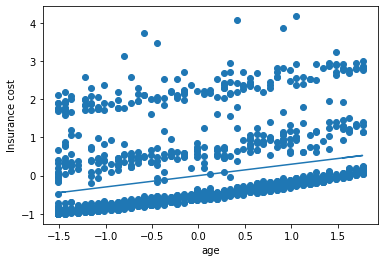

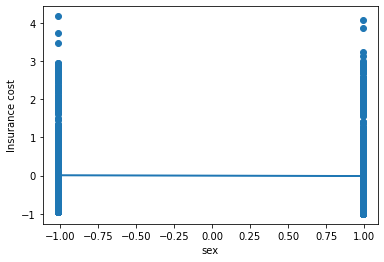

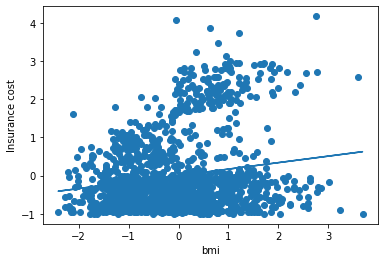

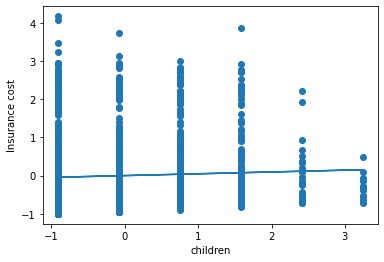

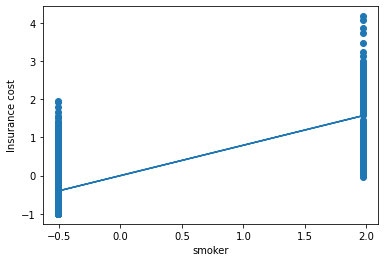

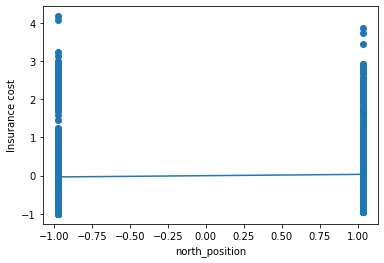

In [ ]:
for i in range(6):
    plt.scatter(X[:, i], y)
    plt.xlabel(feature_names[i])
    plt.ylabel("Insurance cost")

    variable_only_preds = insurance_model.parameters[i]*X[:, i] + insurance_model.parameters[-1]
    plt.plot(X[:, i], variable_only_preds)
    plt.show()

Ora possiamo anche vedere visivamente e chiaramente quali caratteristiche sono importanti per il rischio per la salute (quantificato come denaro richiesto dall'assicurazione).

# Insiemi di Training e Validation

In generale nel machine learning si possono utilizzare modelli molto più complessi rispetto a modelli lineari. Se il numero di parametri di un modello aumenta allora diminuirà l'errore di previsione sui dati utilizzati per allenare (svolgere il fit del) il modello, ma, questa performance potrebbe aumentare a causa della "memorizzazione" della $y$ per punti noti (ovvero il modello si basa su pattern specifici degli esempi che gli diamo come input che però non generalizzano) invece che a causa di una sostanziale miglioria della qualità dell'adattamento tra "spiegazione" (modello) e dati. Questo è il fenomeno dell'overfitting.

Possiamo accorgerci della presenza di overfitting dividendo il dataset in training (di solito ~80%) e validation (di solito ~20%) e osservando la performance del modello sul dataset di validation. Nell'esempio di prima ho utilizzato un solo dataset per allenemento e valutazione della performance perché è molto improbabile avere overfitting con un modello lineare, perché un modello lineare è il modello più semplice possibile per un problema di regressione. Comunque è importante tenere a mente questa considerazione quando si lavora con modelli più complessi.

# Materiali interessanti per approfondire

- Discussione del problema del fit lineare più dettagliata dal punto di vista matematico: https://mathworld.wolfram.com/LeastSquaresFitting.html

- Generalizzazione a funzioni non-lineari: https://mathworld.wolfram.com/NonlinearLeastSquaresFitting.html

- Le reti neurali artificiali, lo stato dell'arte dell'intelligenza artificiale, non sono altro che un'enormità di modelli lineari collegati in maniera appropriata (con funzioni di attivazione non-lineari) tra loro e allenati (l'allenamento è la ricerca dei pesi ottimali) in maniera progressiva invece che con una singola operazione: https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi